In [ ]:
import ast
import numpy as np
import time
import sys
import pandas as pd
import subprocess
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import validation_curve
import random as rand
import matplotlib.pyplot as plt
import time
import math
import torch
from torch.utils.data.sampler import SubsetRandomSampler
import torch.nn as nn
import torch.nn.functional as F
import seaborn as sns
sns.set()
%config InlineBackend.figure_format='retina'

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Google Colab
%cd "drive/My Drive/internship-2020"

/content/drive/My Drive/internship-2020


### sklearn Model

In [ ]:
%%time
from npm1_data_loading import km_normed_1, npm1_filtered
print(km_normed_1.shape)
classifier = MLPClassifier(hidden_layer_sizes=(512,128,8), 
                           max_iter=1000, 
                           activation = 'relu', 
                           solver='sgd', 
                           learning_rate='adaptive', 
                           tol=0, shuffle=True, 
                           random_state=0, verbose=0
                           )
x_train, x_test, y_train, y_test = train_test_split(km_normed_1, npm1_filtered, random_state=0)
classifier.fit(x_train, y_train)

(691, 1309)
CPU times: user 1min 27s, sys: 21.7 s, total: 1min 49s
Wall time: 57.8 s


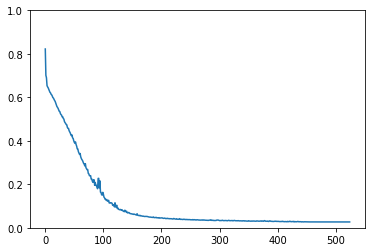

0.9921875
[0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0
 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0
 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1
 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0
 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
[0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0
 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0
 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1
 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0 0 1 0
 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [ ]:
plt.plot(classifier.loss_curve_)
plt.ylim(0, 1)
plt.show()
y_pred = classifier.predict(x_test)
print(roc_auc_score(y_test, y_pred))
print(y_pred)
print(np.array(y_test))

In [ ]:
sum(npm1_filtered), len(npm1_filtered) - sum(npm1_filtered)

(242, 449)

### Data Visualisation

In [ ]:
from npm1_data_loading import km_flog10, npm1_filtered
positives = km_flog10.iloc[[i for i in range(len(npm1_filtered)) if npm1_filtered[i] == 1]]
negatives = km_flog10.iloc[[i for i in range(len(npm1_filtered)) if npm1_filtered[i] == 0]]

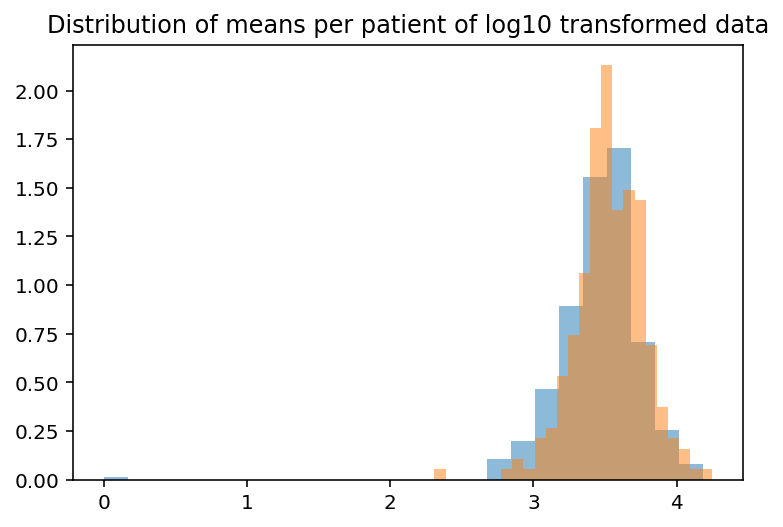

In [ ]:
# Mean per patient
plt.hist(np.mean(negatives,axis=1), bins=25, alpha = 0.5, label='negatives', density=True)
plt.hist(np.mean(positives,axis=1), bins=25, alpha = 0.5, label='positives', density=True)
plt.title("Distribution of means per patient of log10 transformed data")
plt.show()

In [ ]:
def compare_kmer_plot(i):
    print(i)
    plt.hist(negatives[:,i], bins=25, alpha = 0.5, label='negatives', density=True)
    plt.hist(positives[:,i], bins=25, alpha = 0.5, label='positives', density=True)
    plt.show()

950


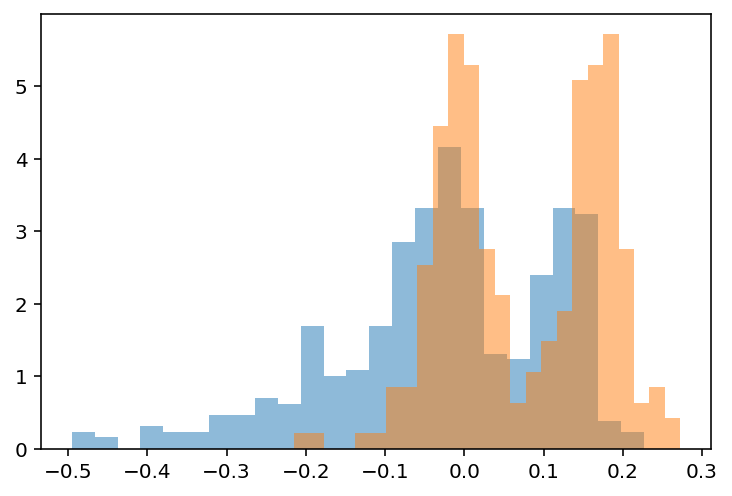

951


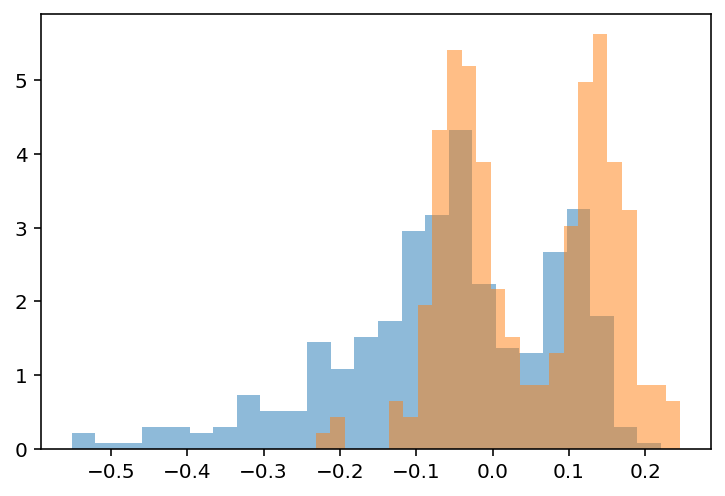

952


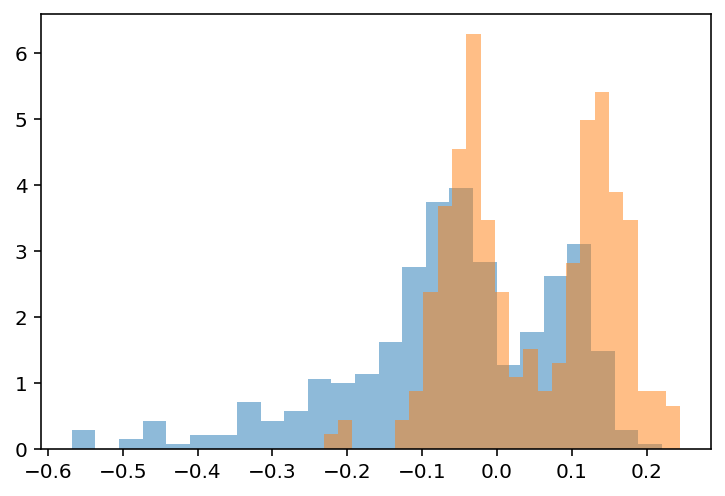

953


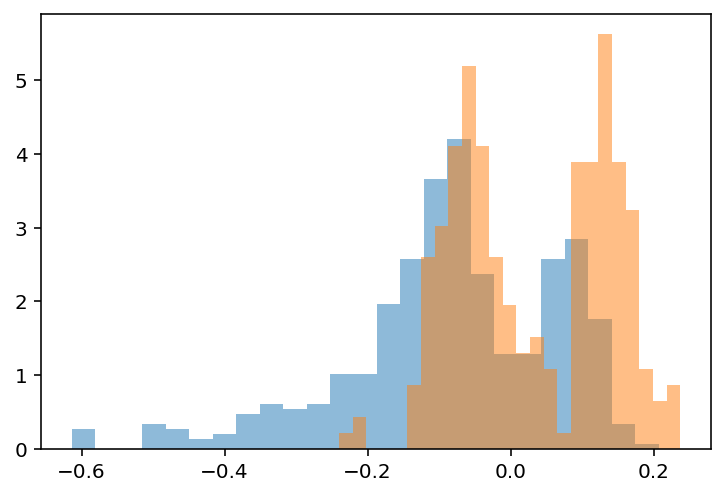

954


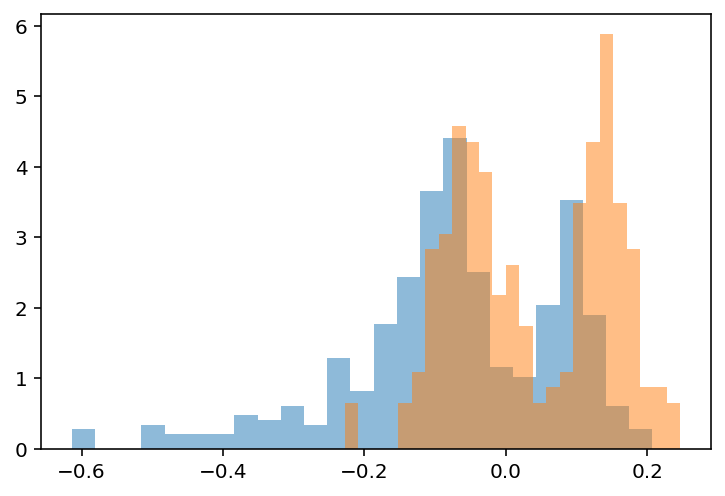

955


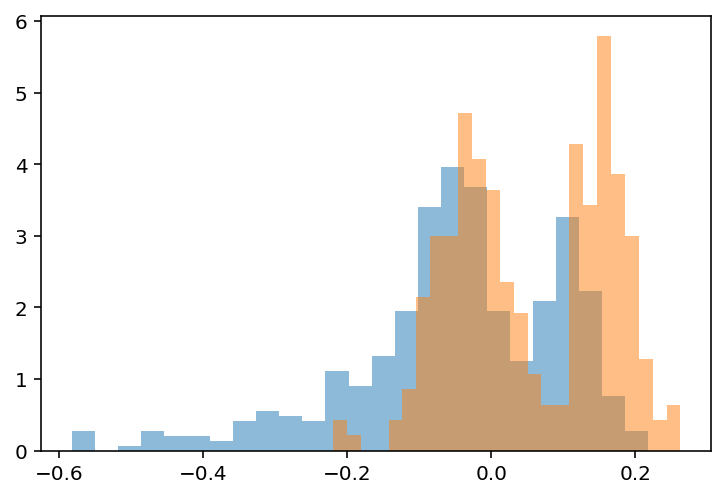

956


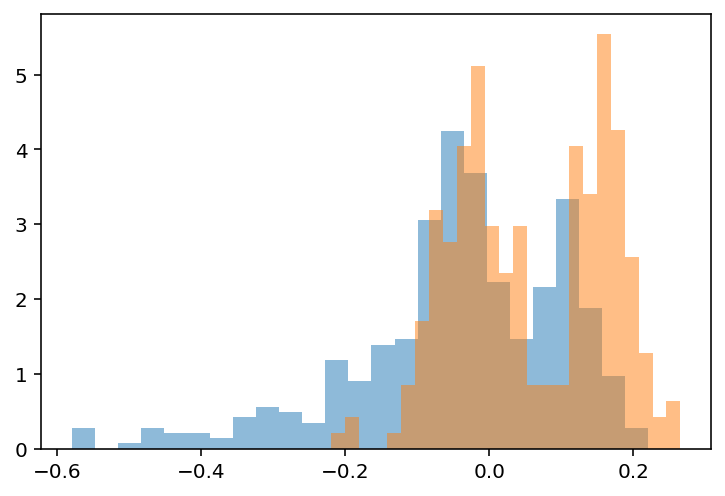

957


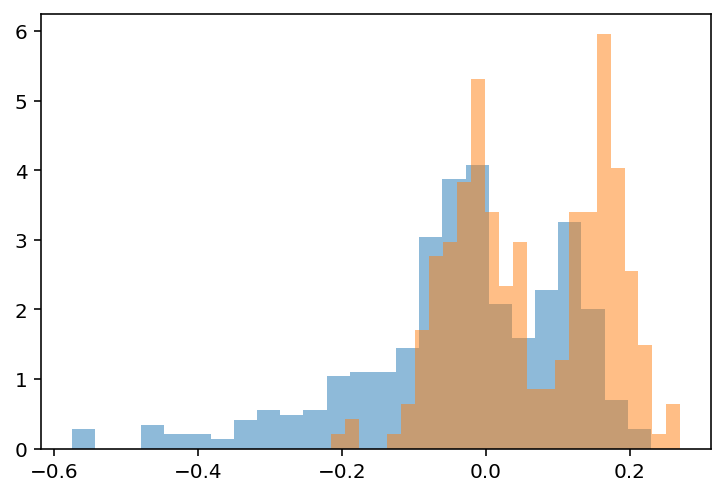

958


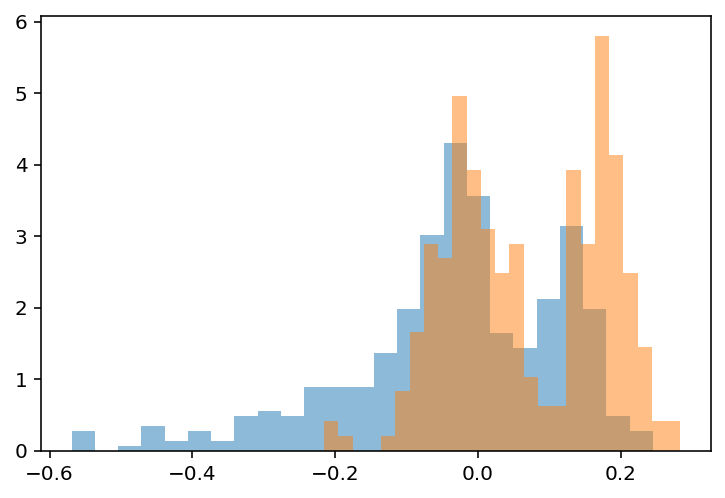

959


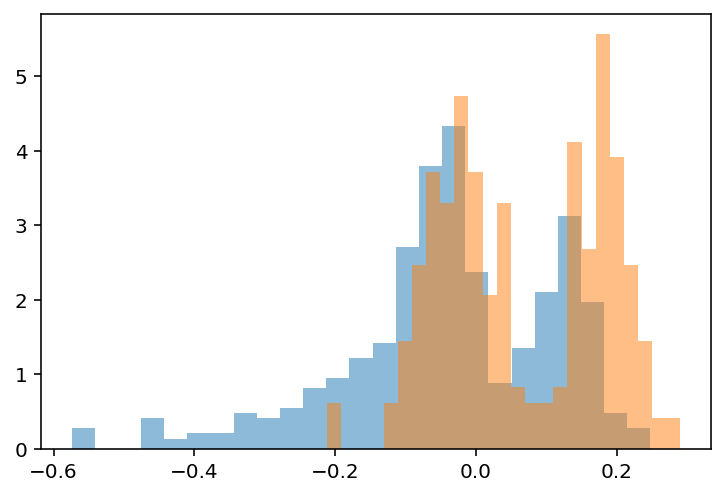

960


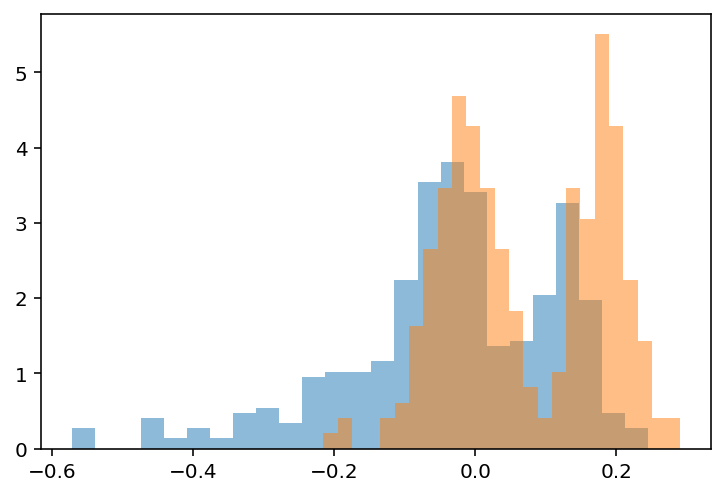

961


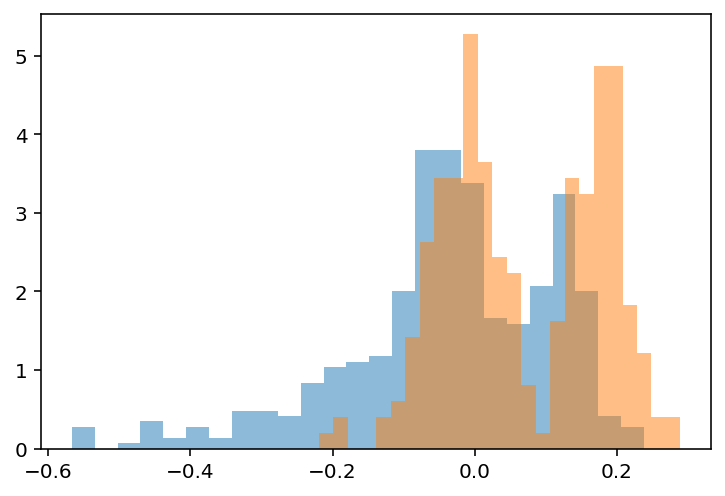

962


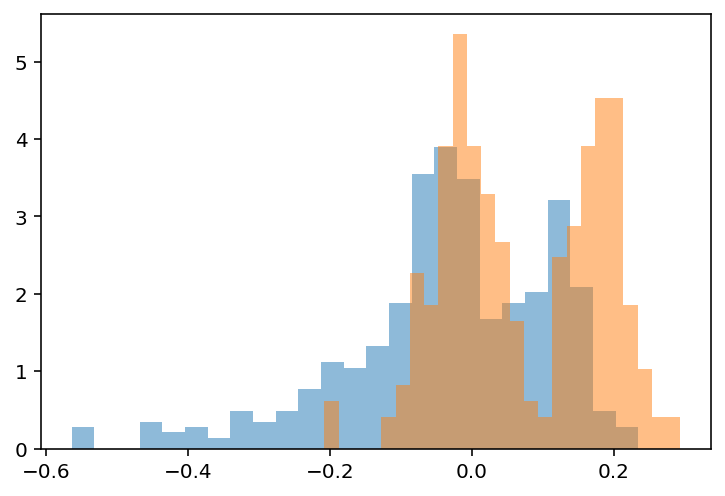

963


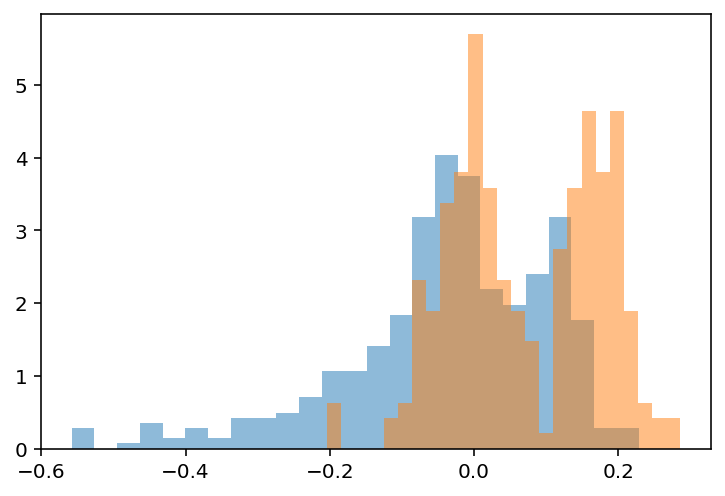

964


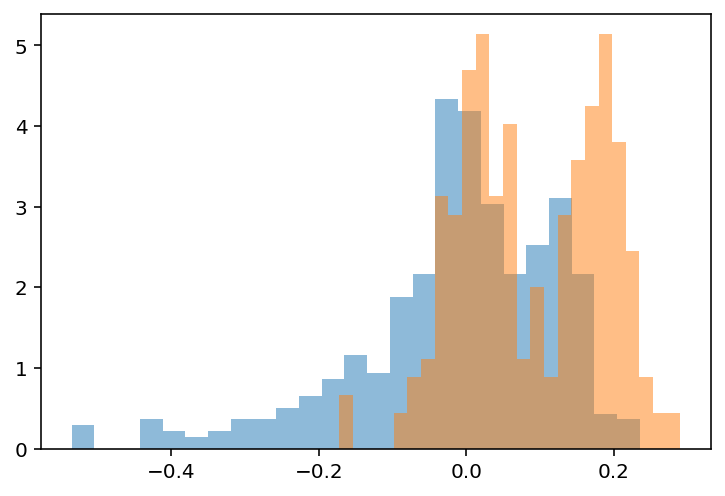

965


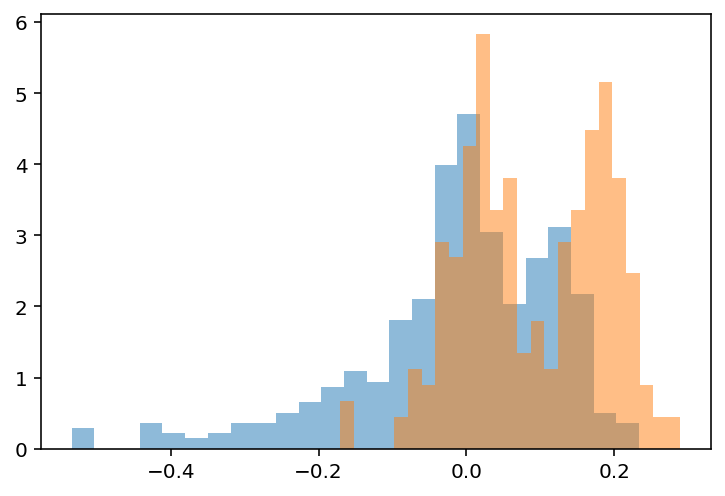

966


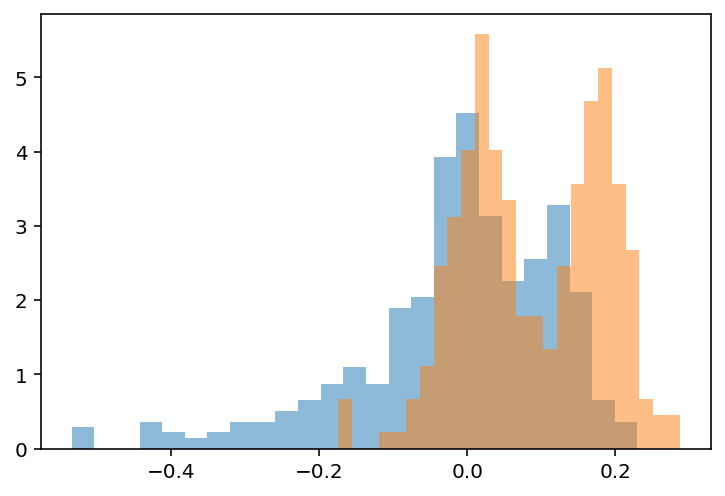

967


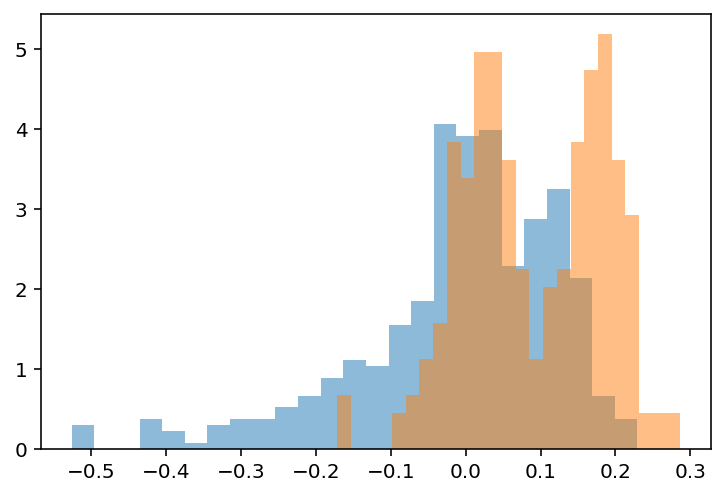

968


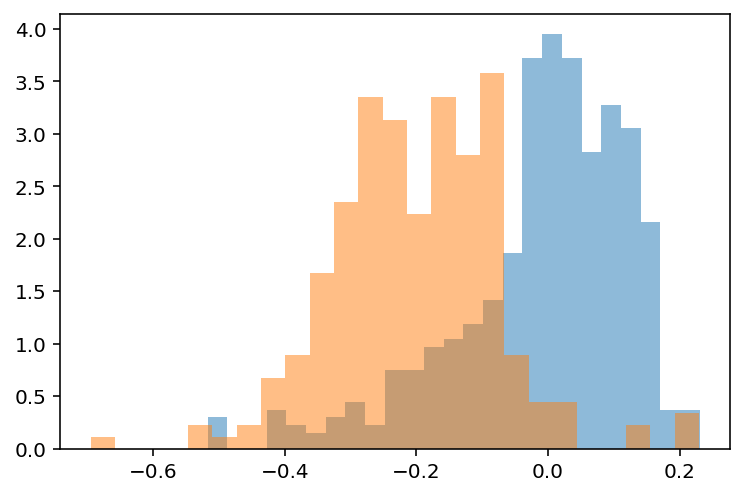

969


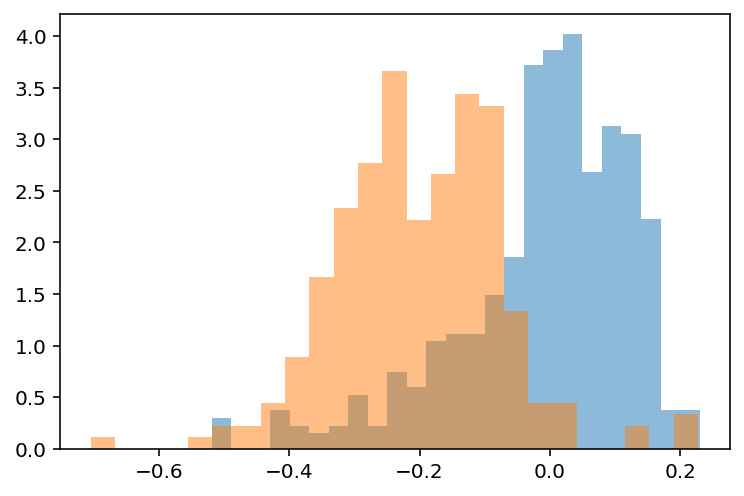

970


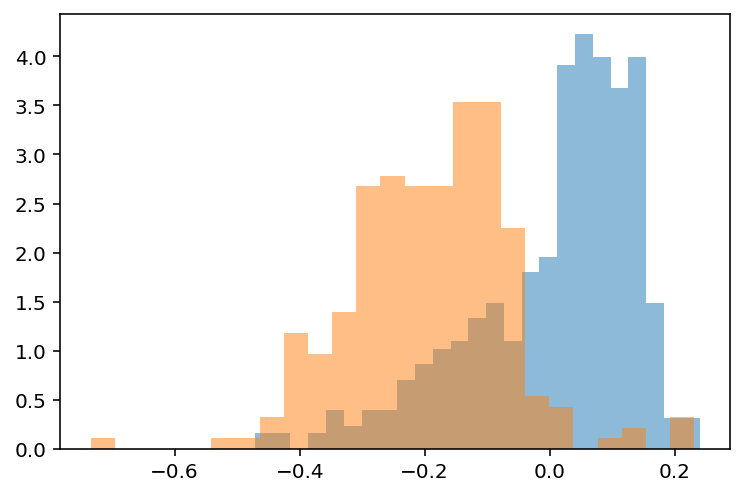

971


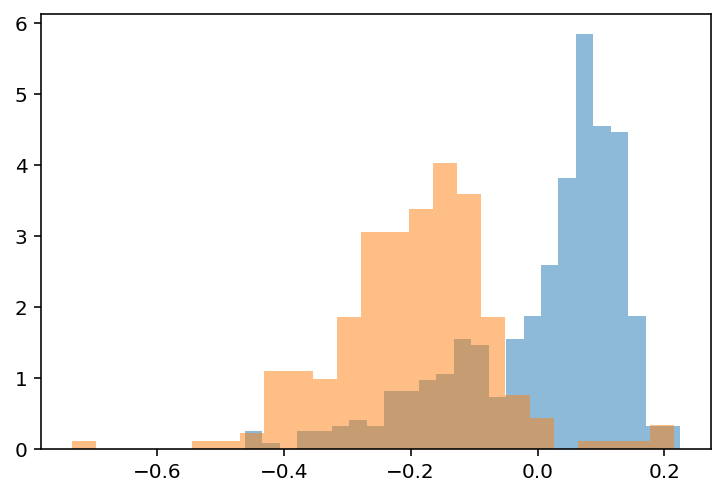

972


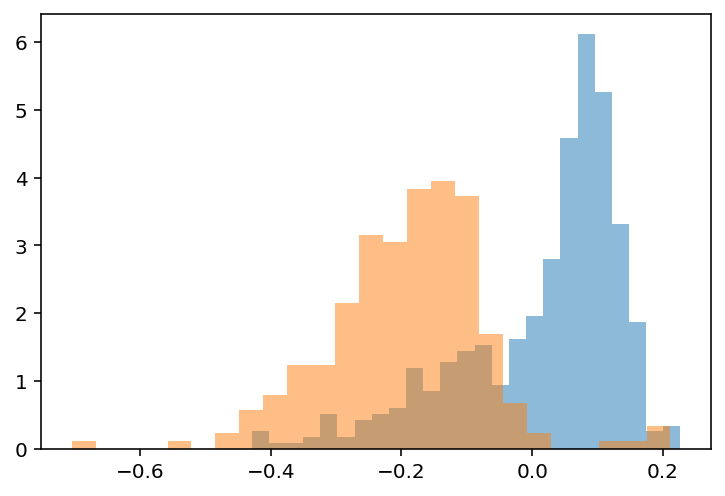

973


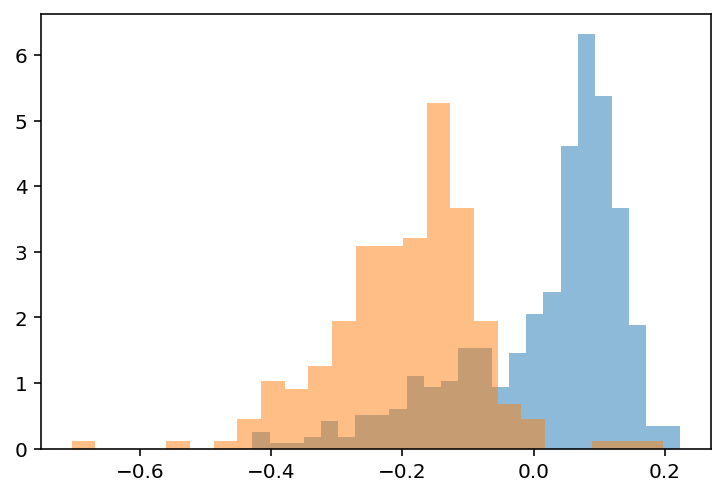

974


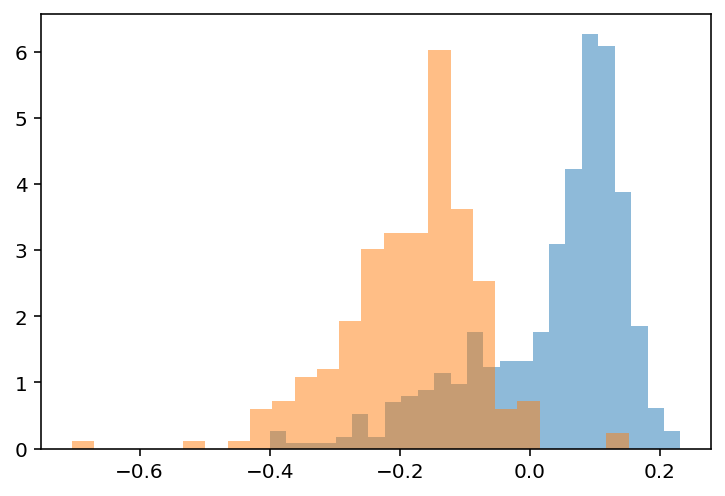

975


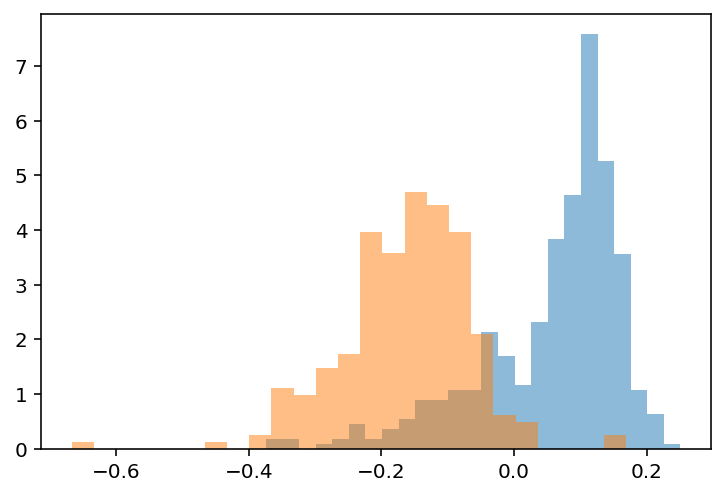

976


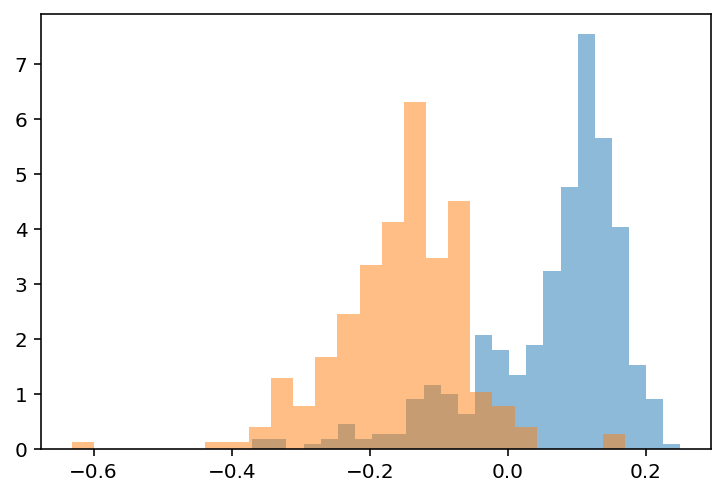

977


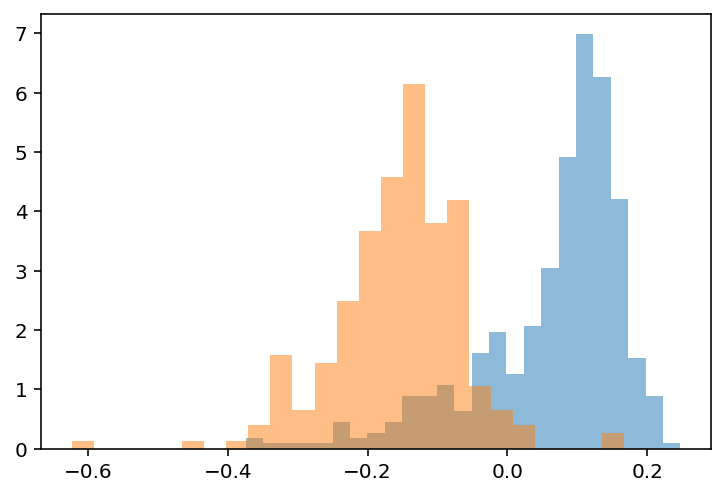

978


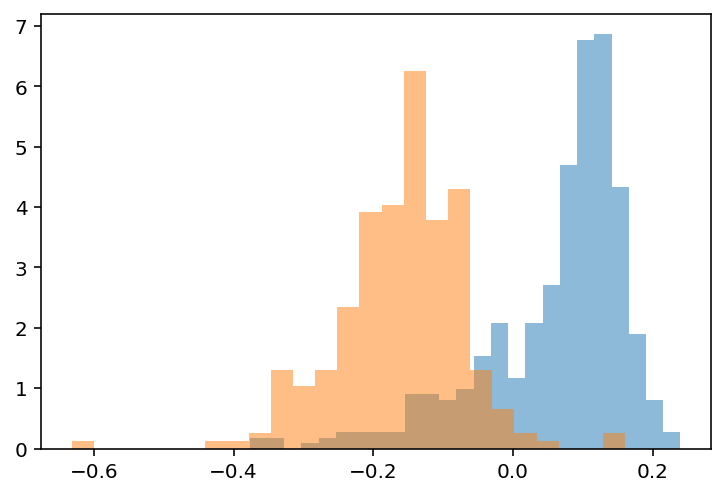

979


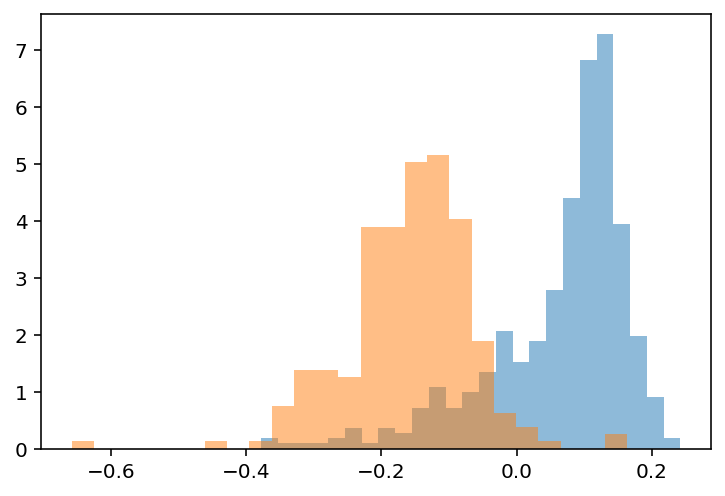

980


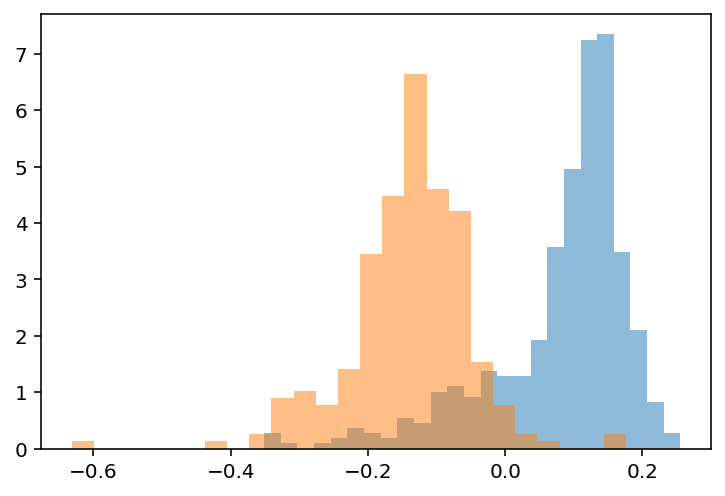

981


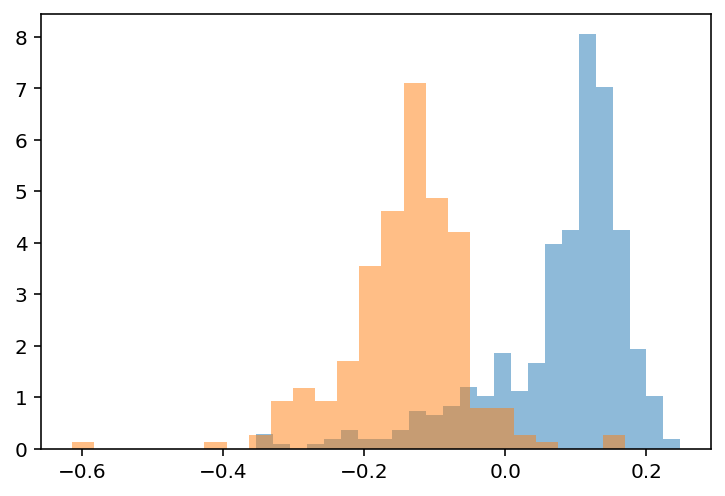

982


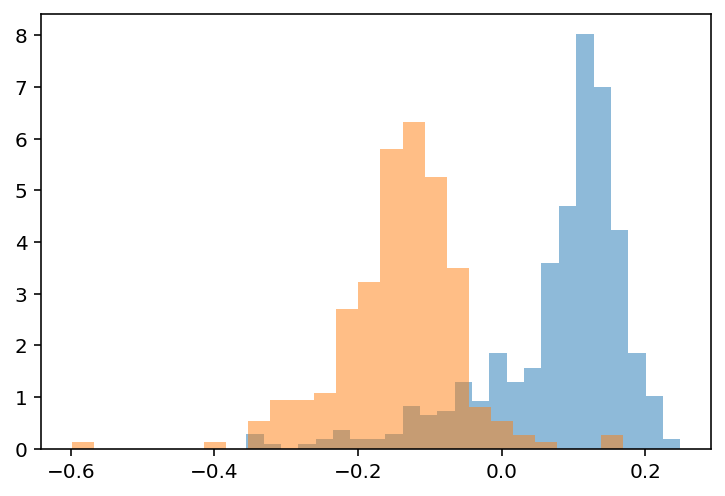

983


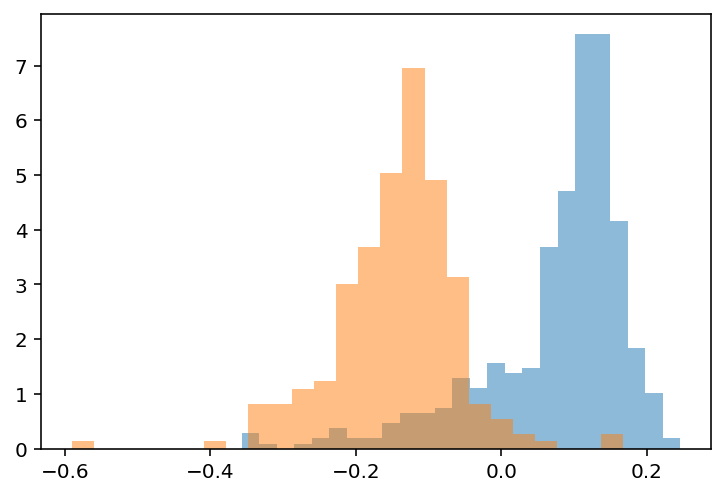

984


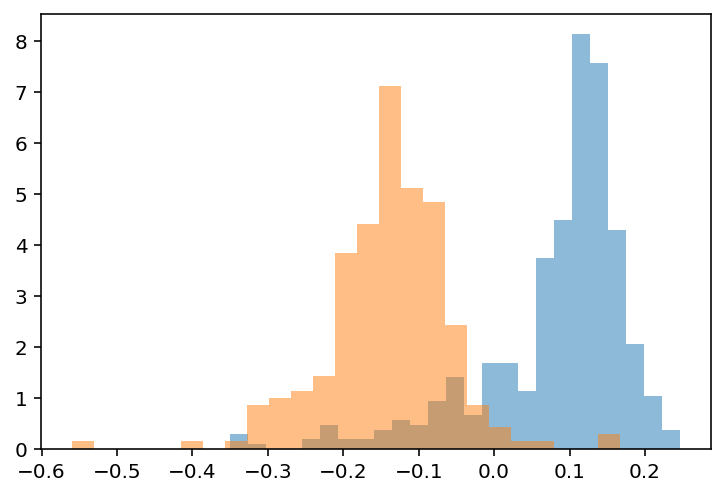

985


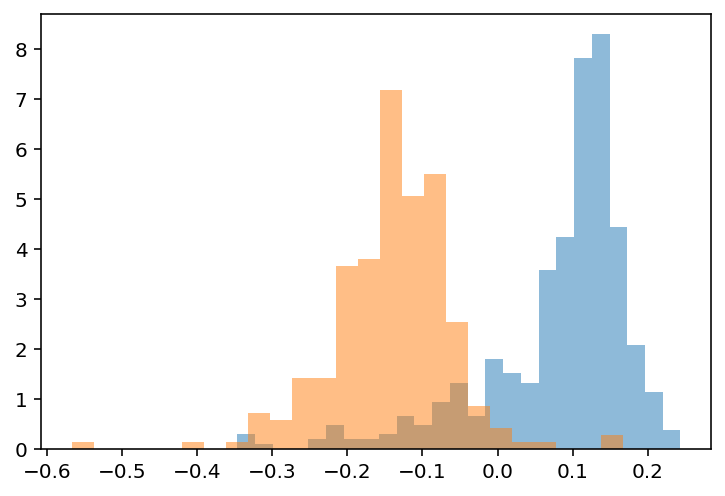

986


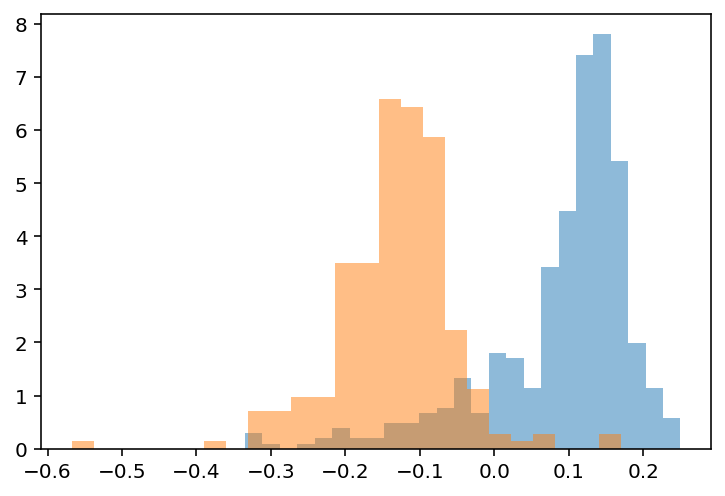

987


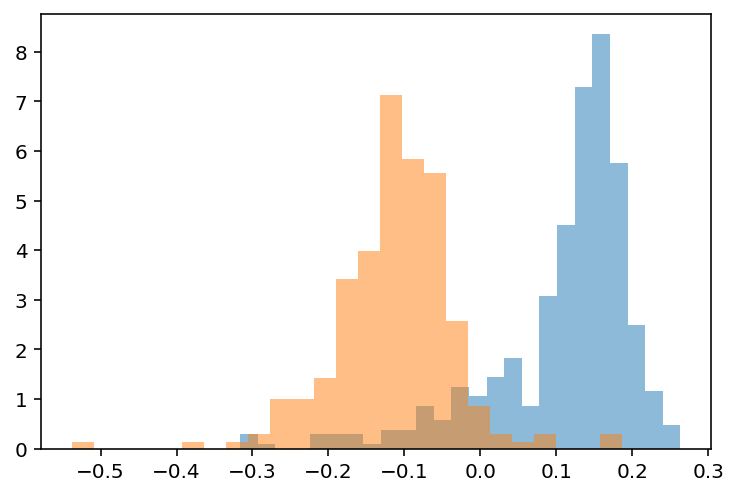

988


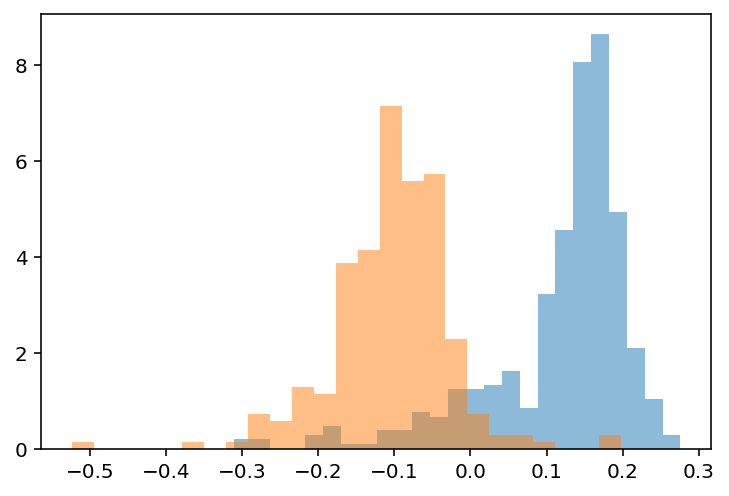

989


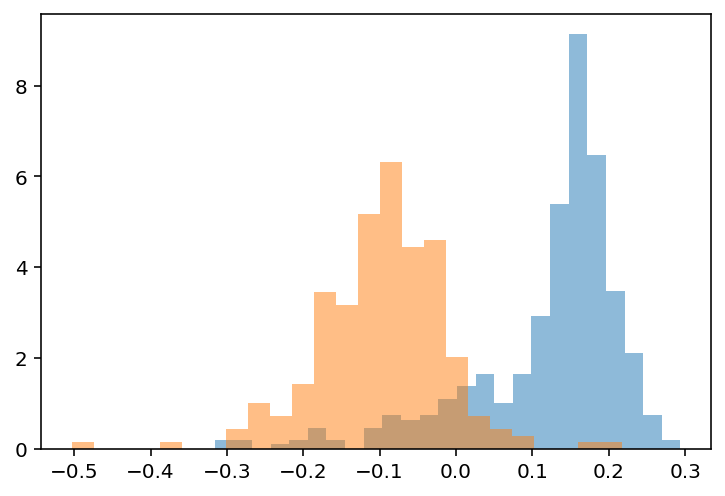

990


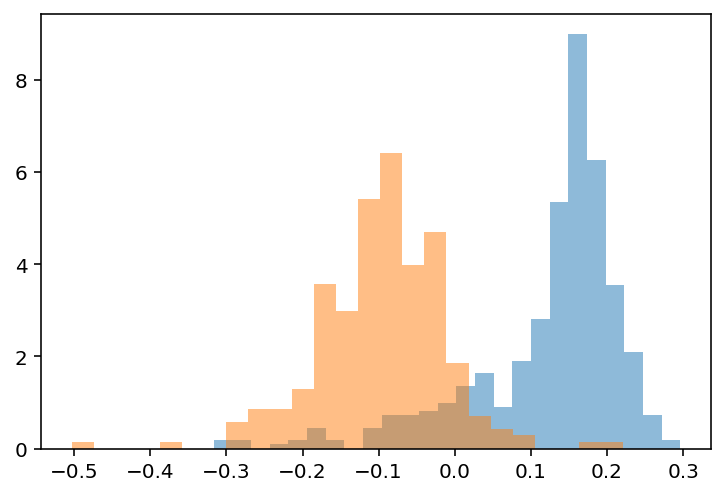

991


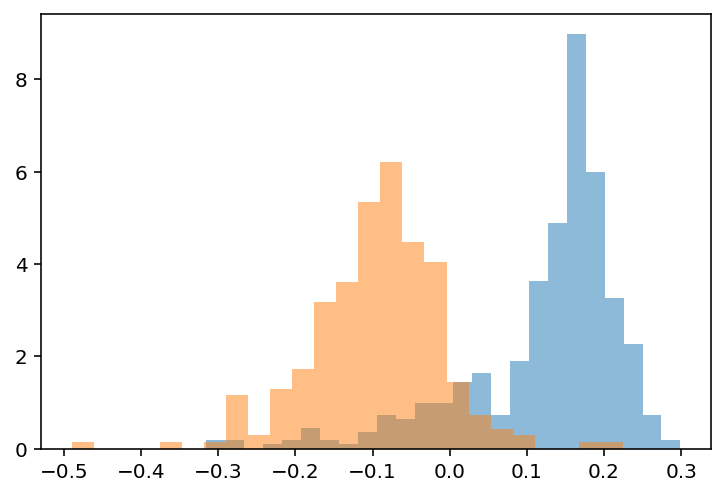

992


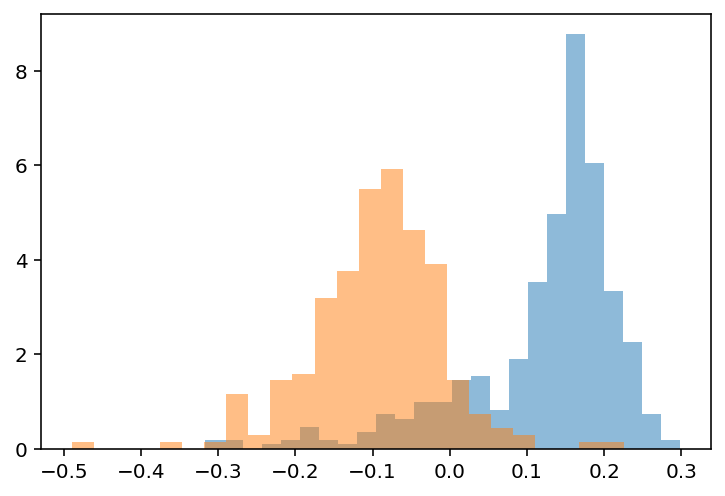

993


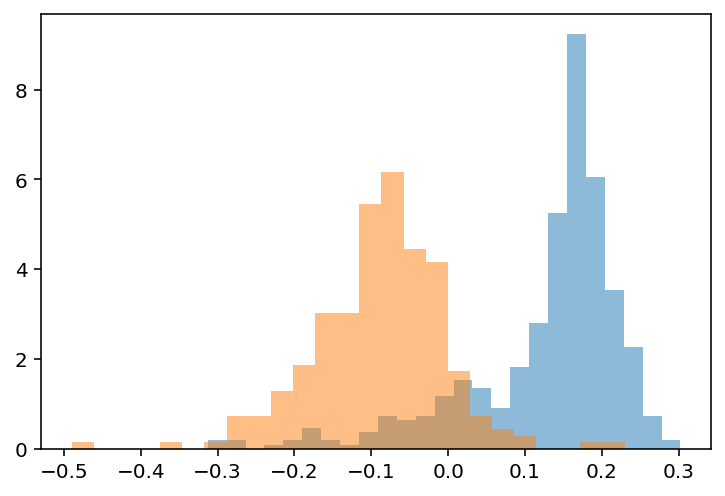

994


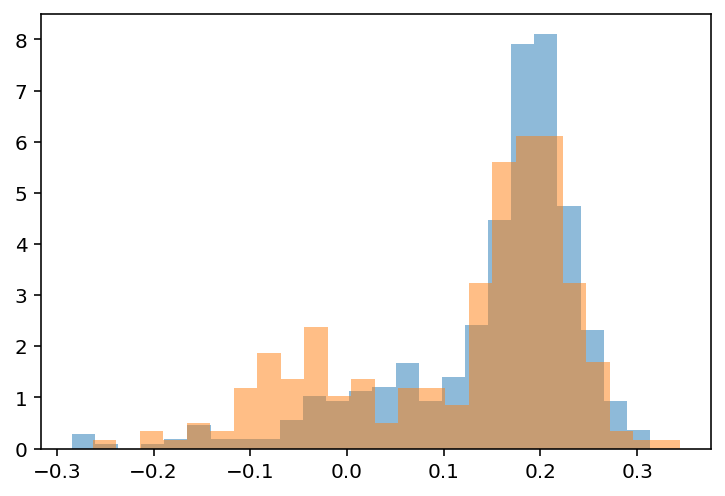

995


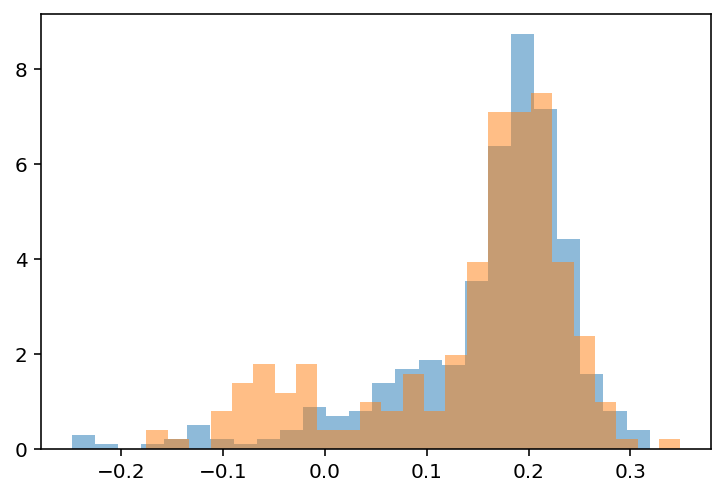

996


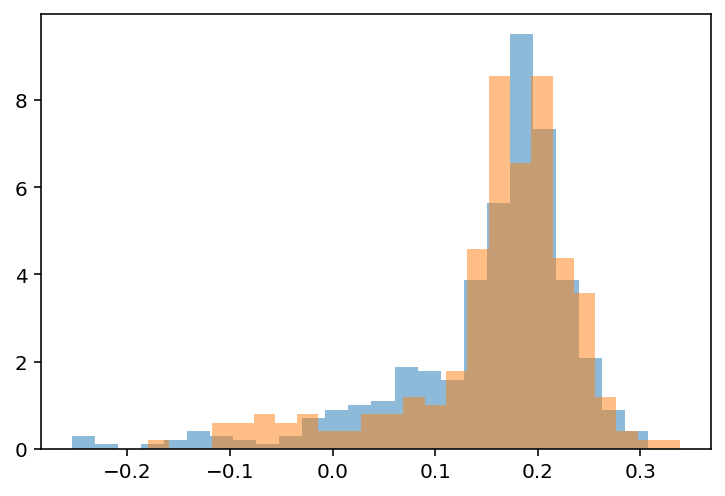

997


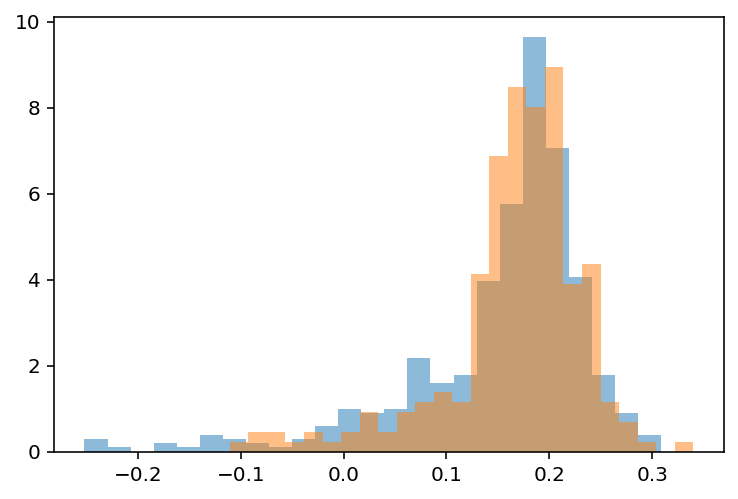

998


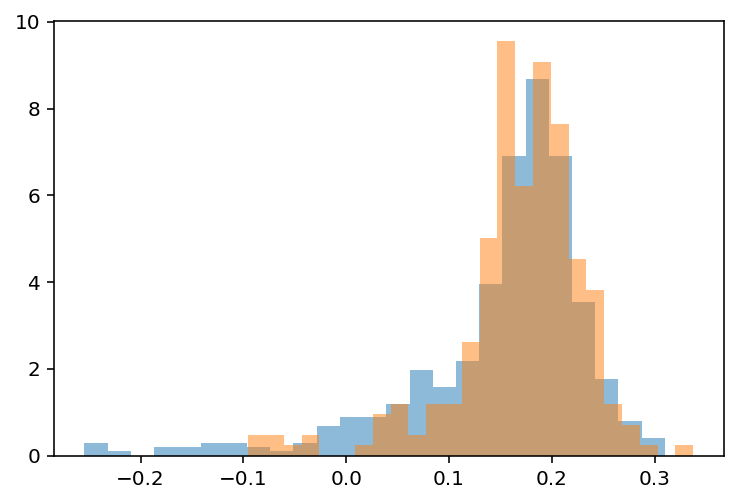

999


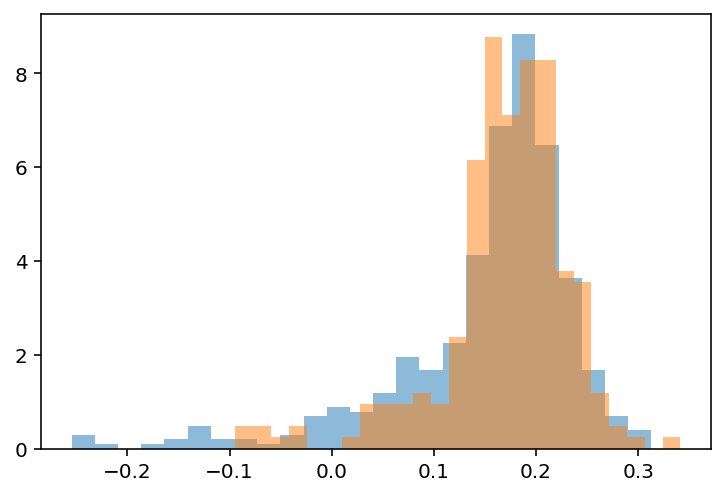

1000


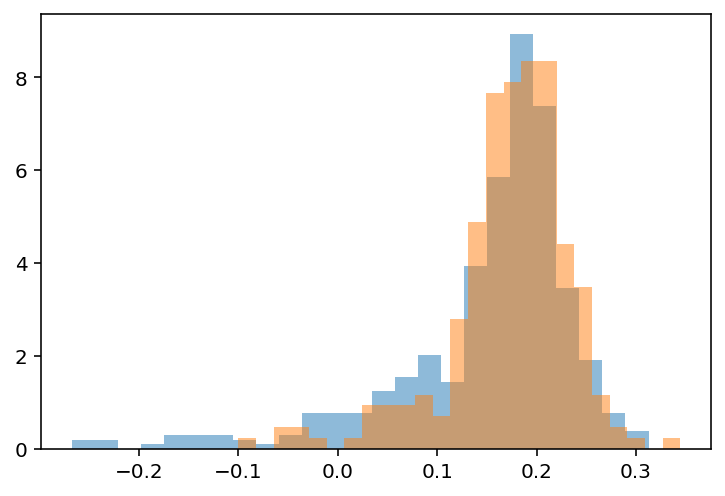

1001


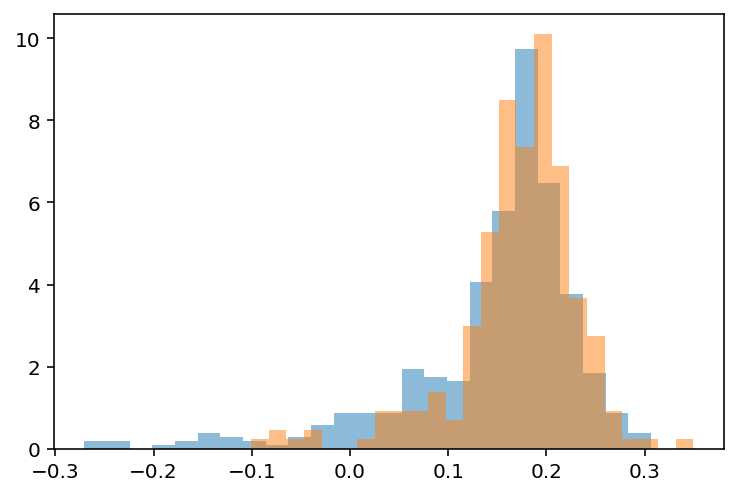

1002


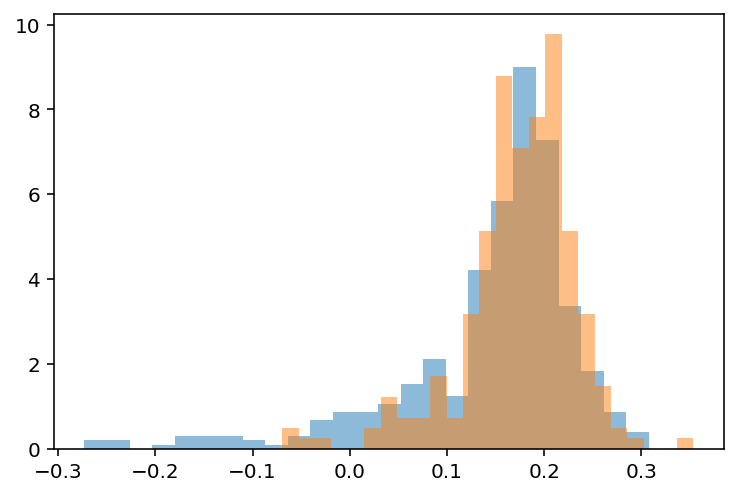

1003


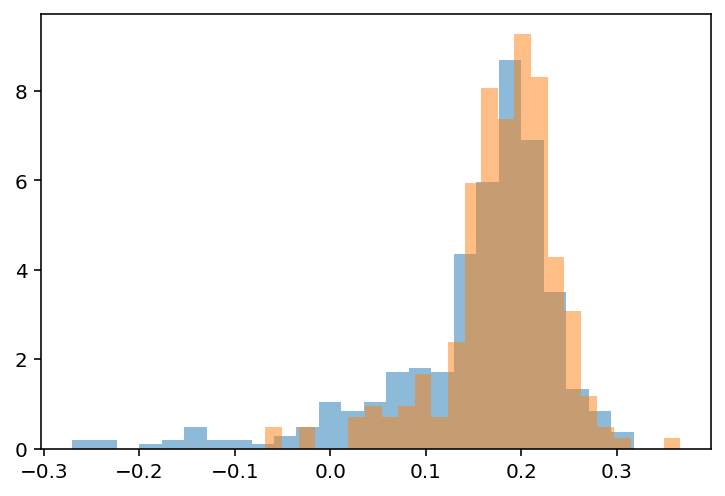

1004


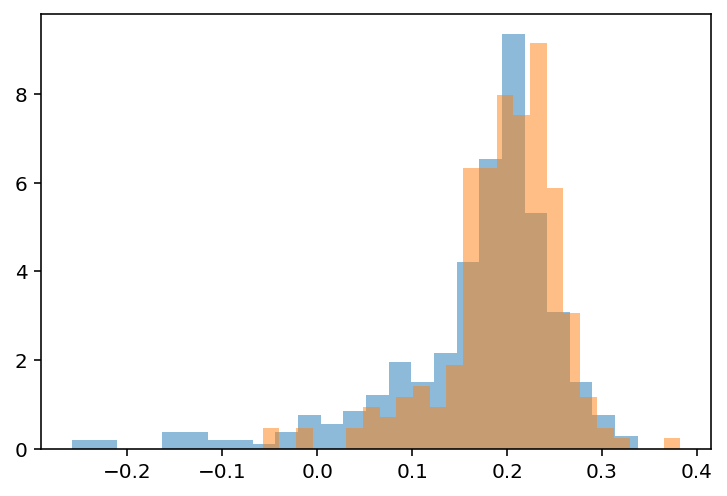

1005


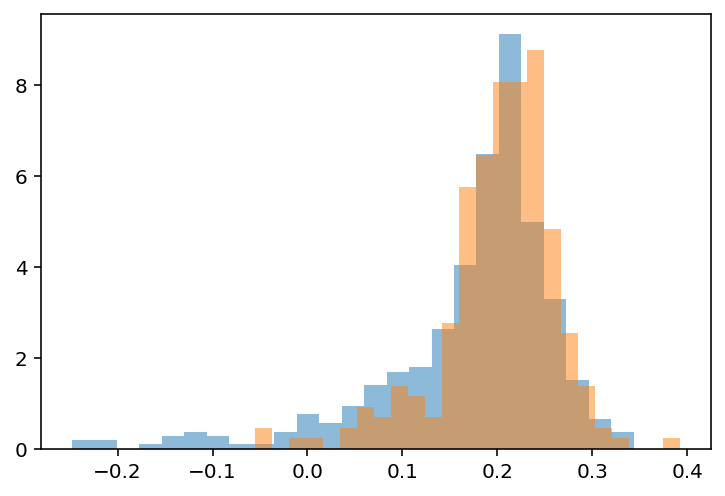

1006


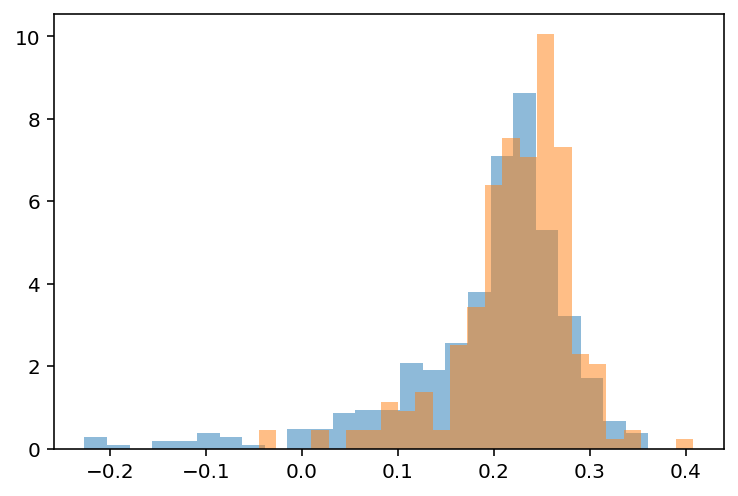

1007


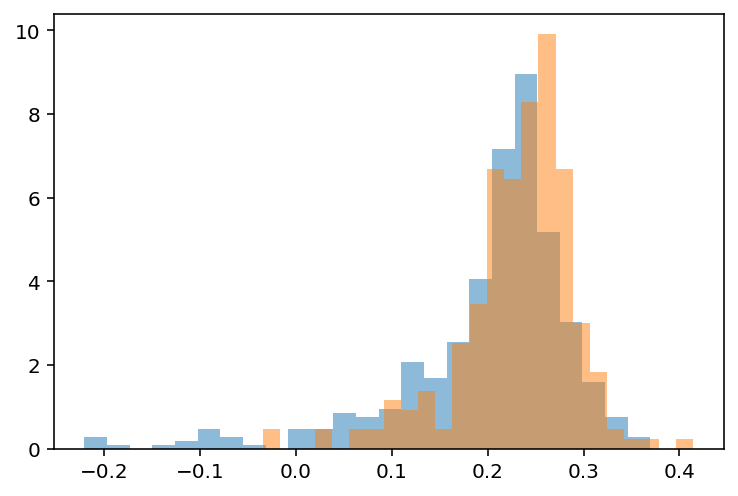

1008


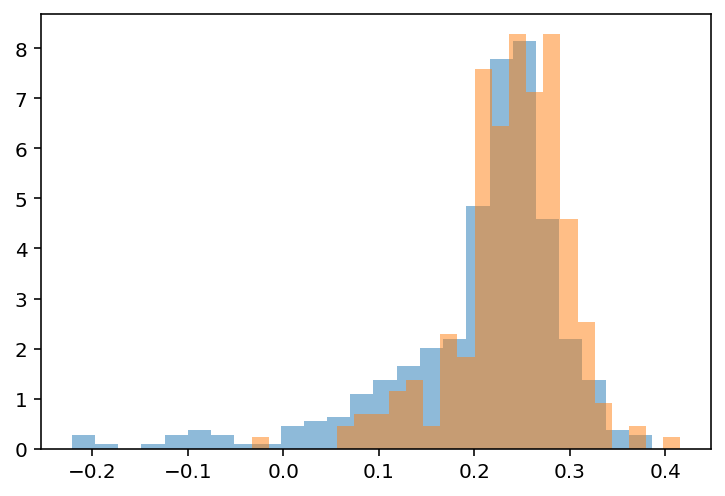

1009


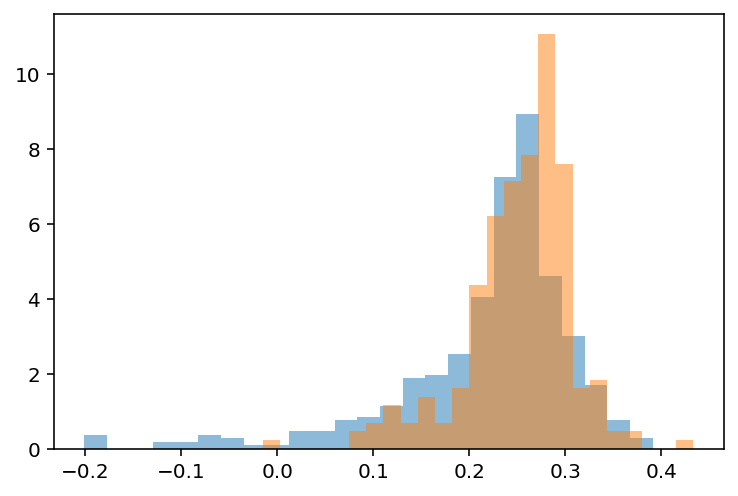

1010


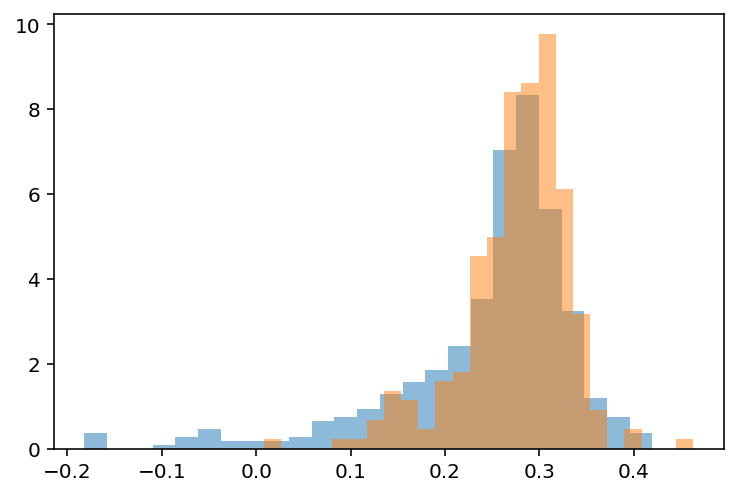

1011


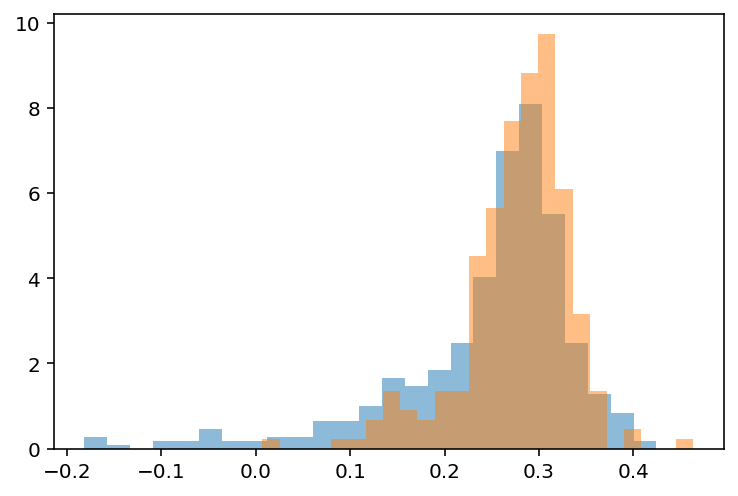

1012


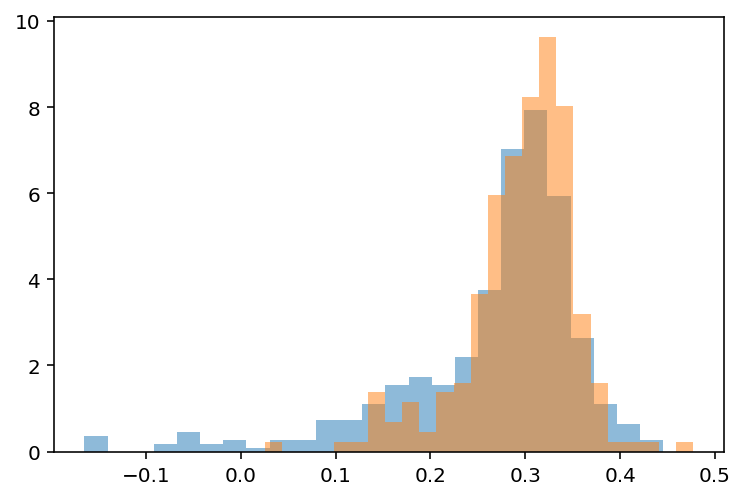

1013


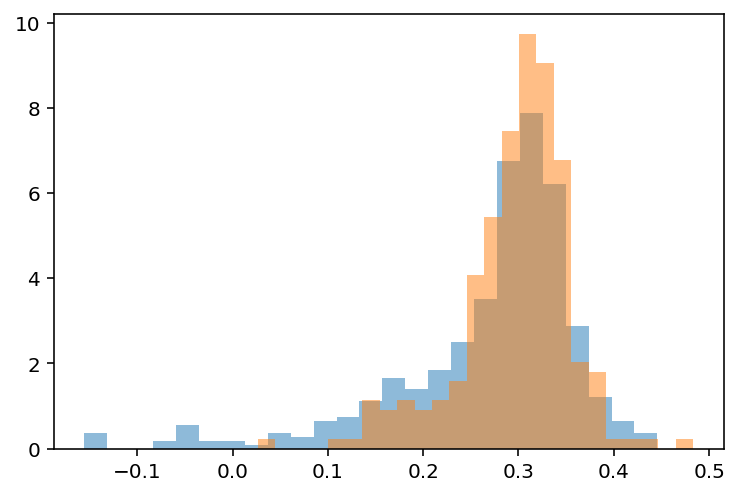

1014


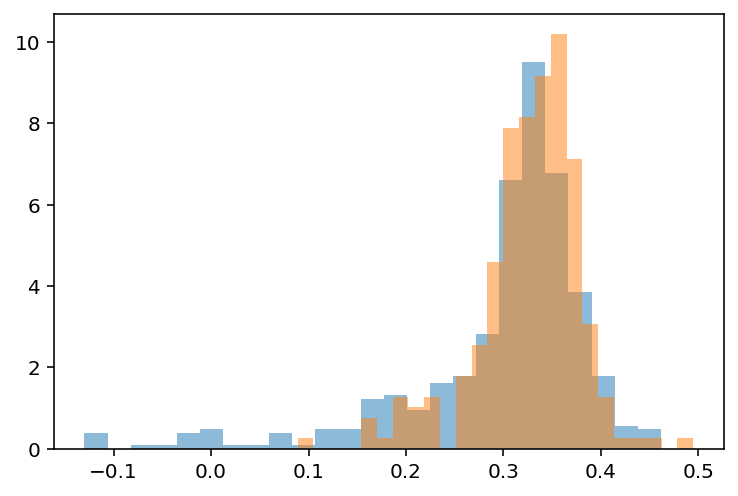

1015


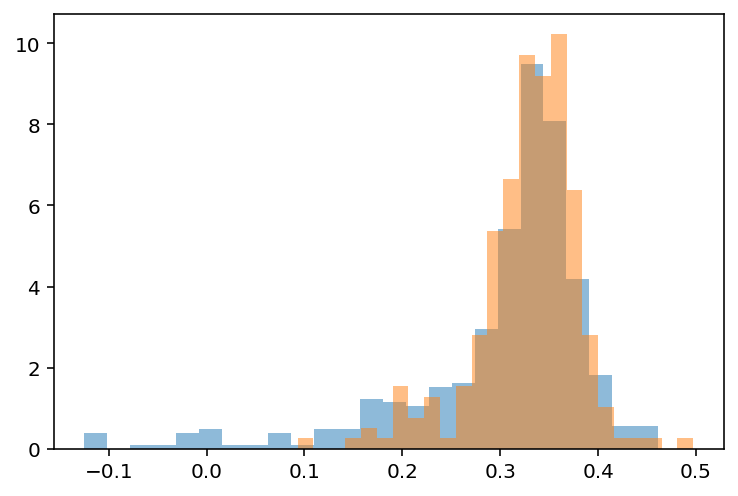

1016


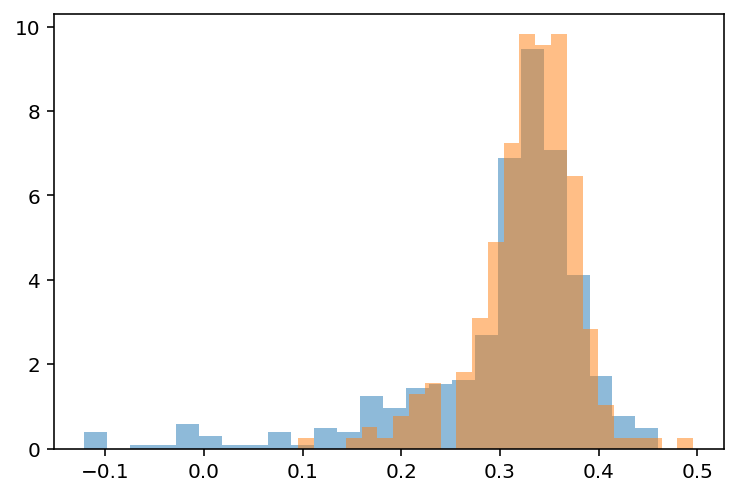

1017


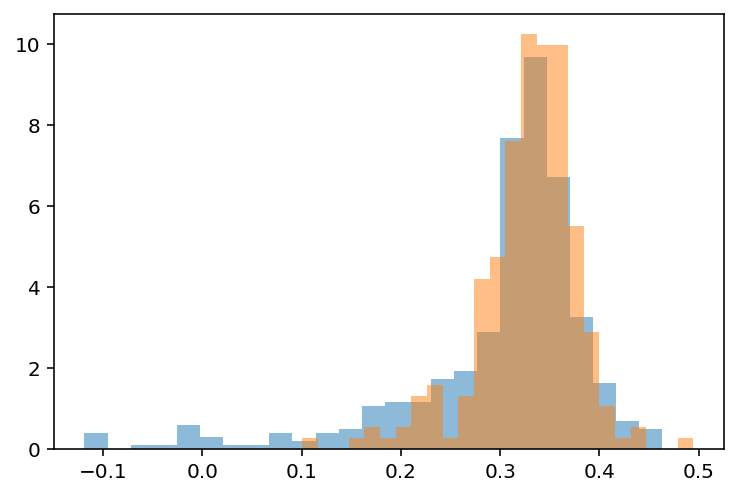

1018


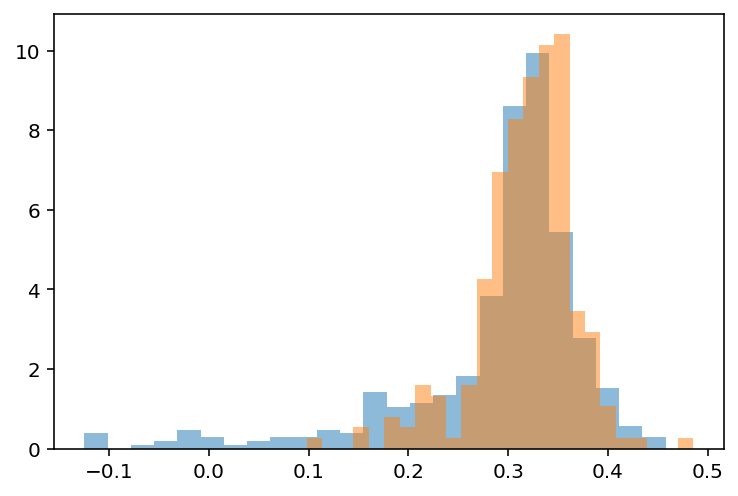

1019


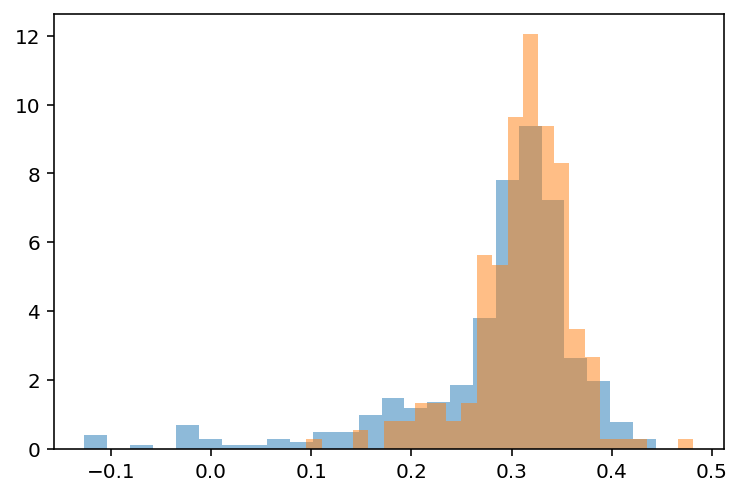

1020


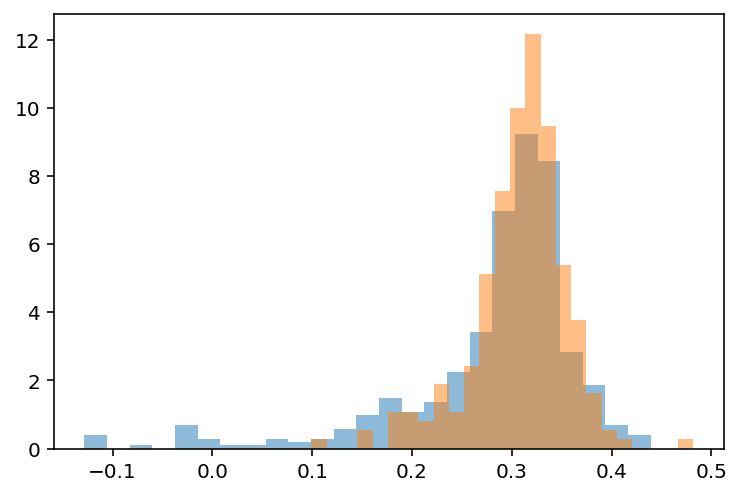

1021


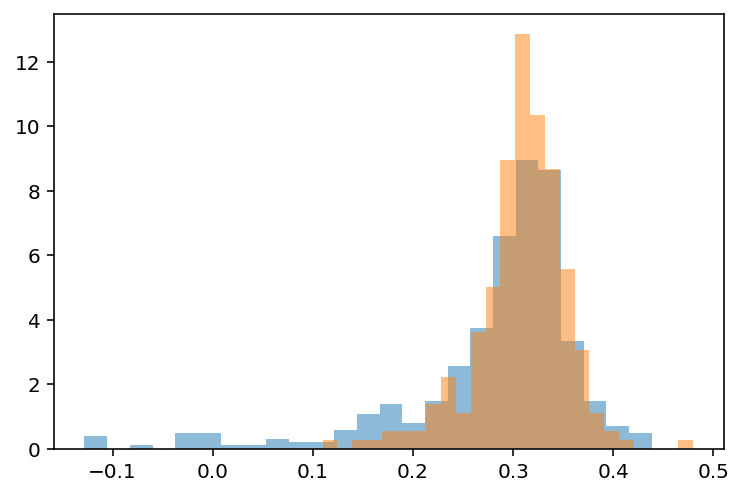

1022


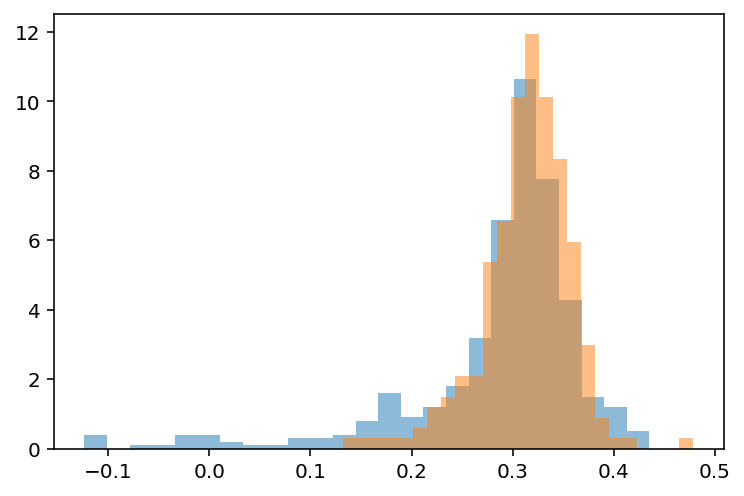

1023


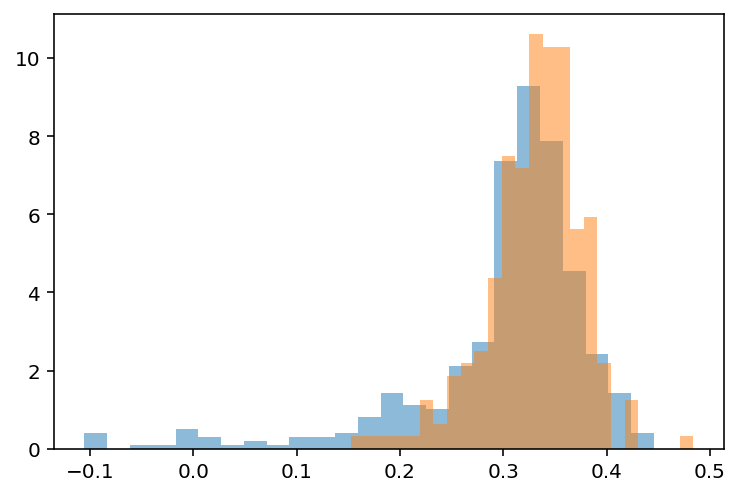

1024


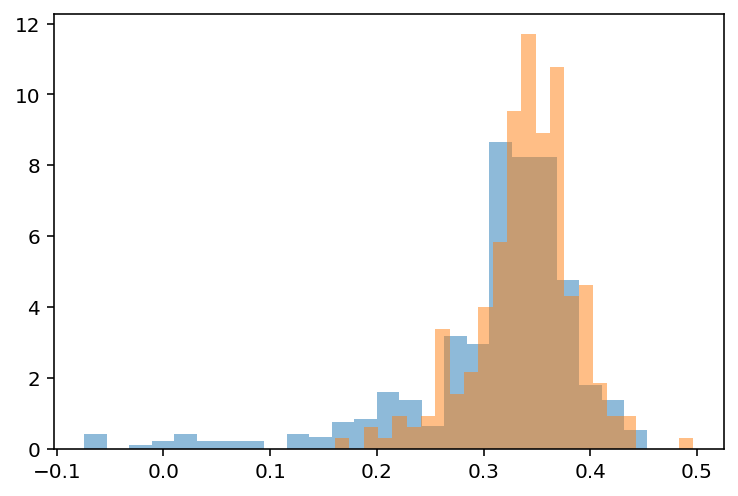

1025


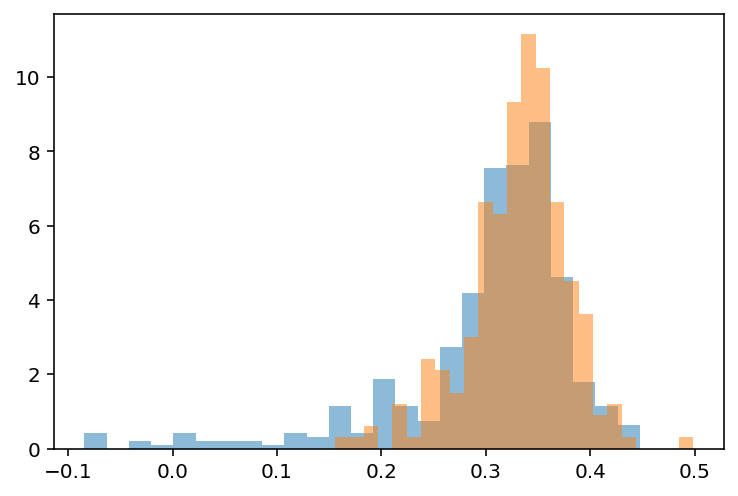

1026


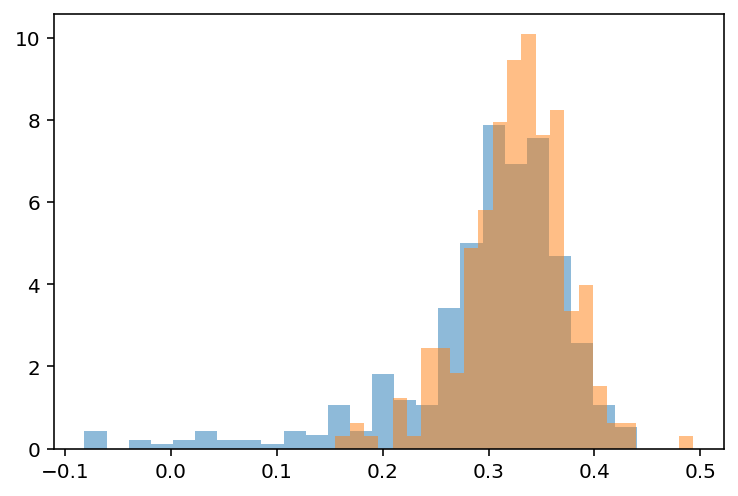

1027


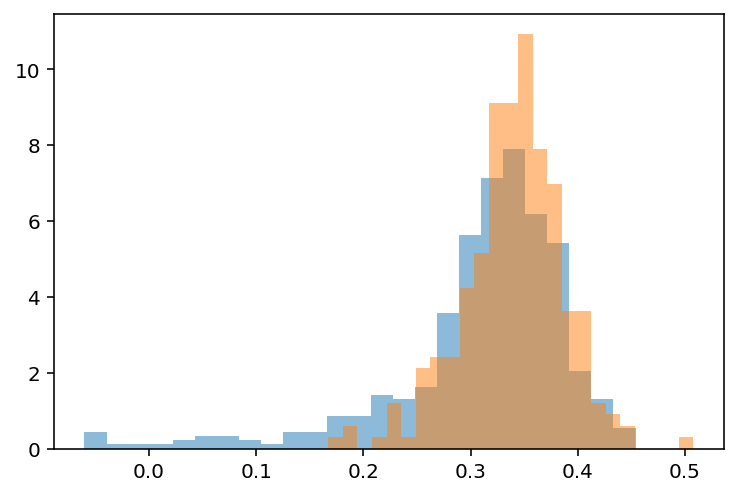

1028


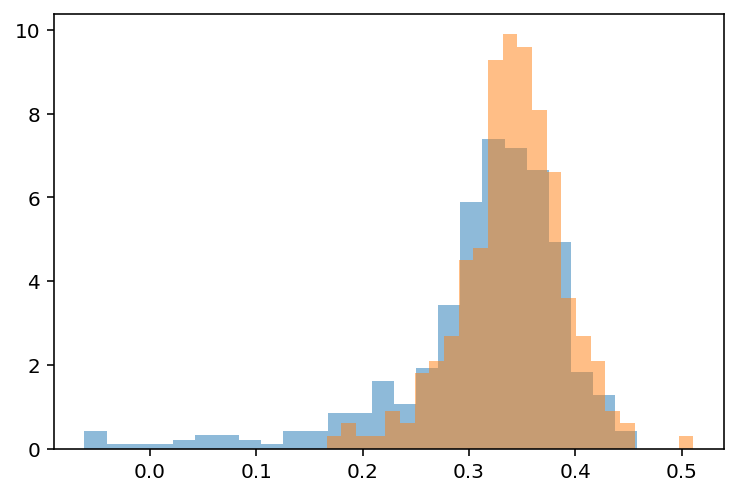

1029


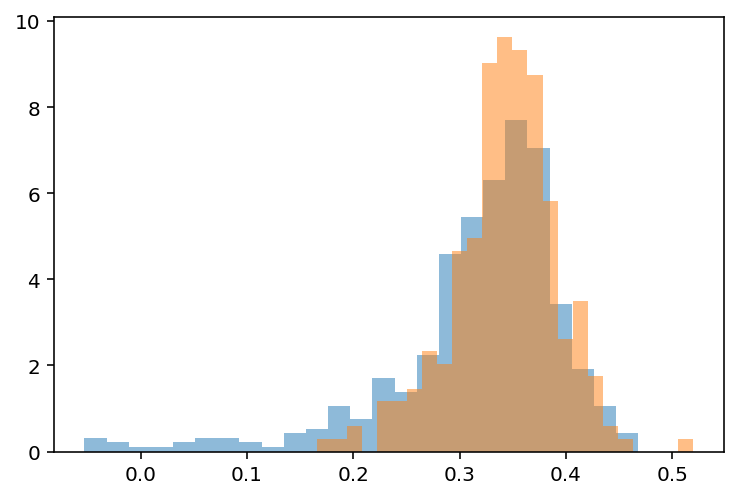

1030


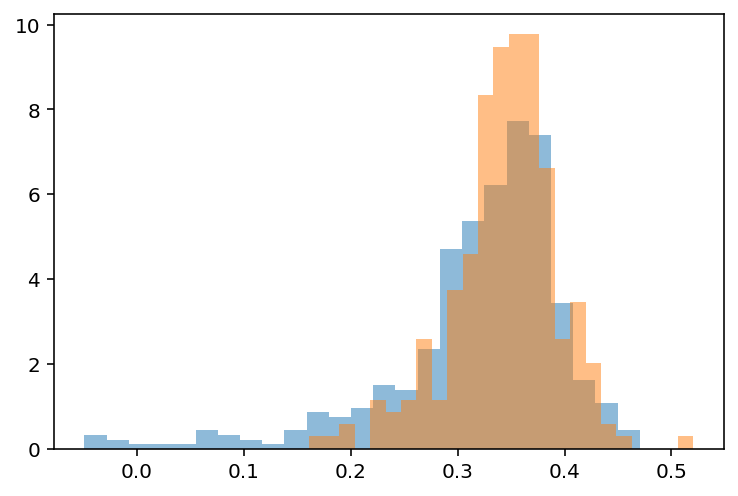

1031


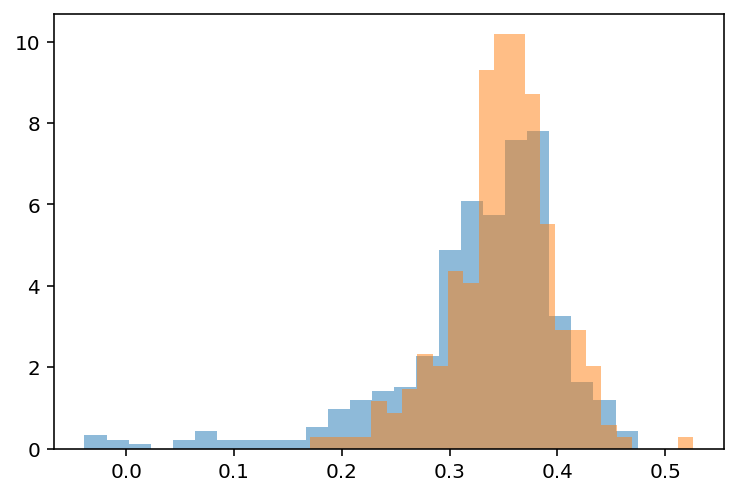

1032


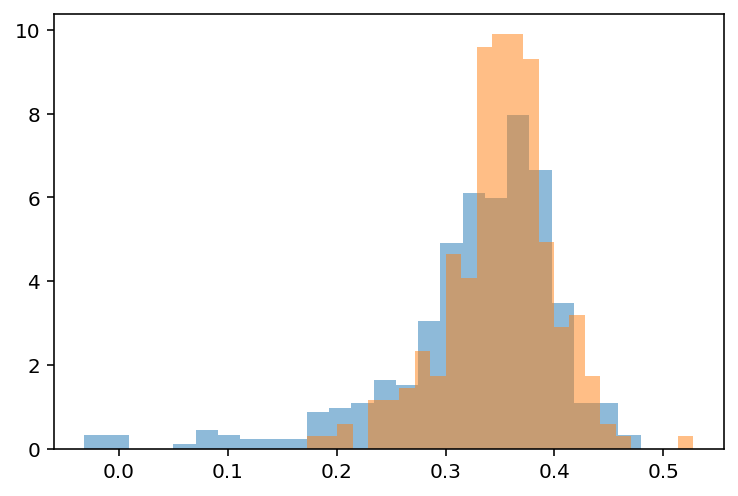

1033


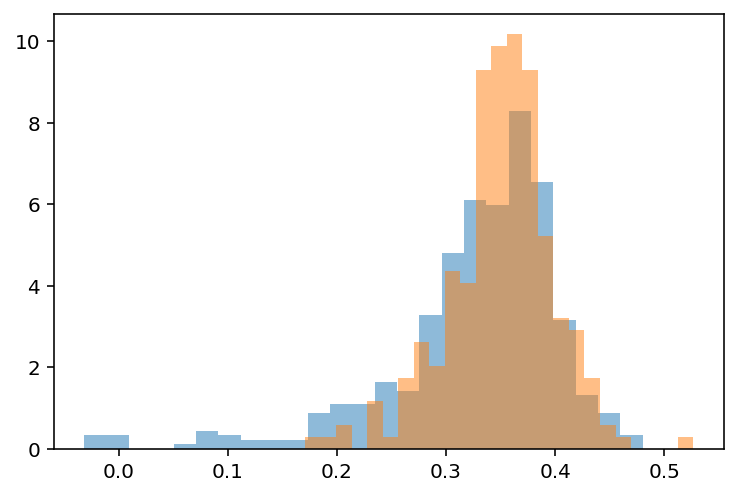

1034


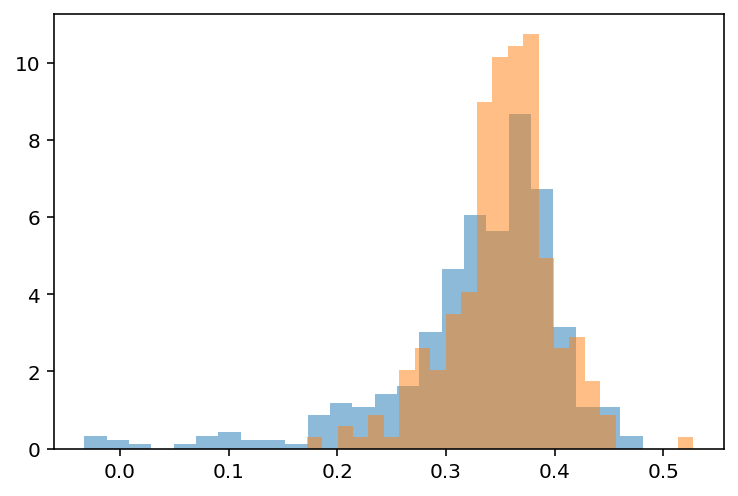

1035


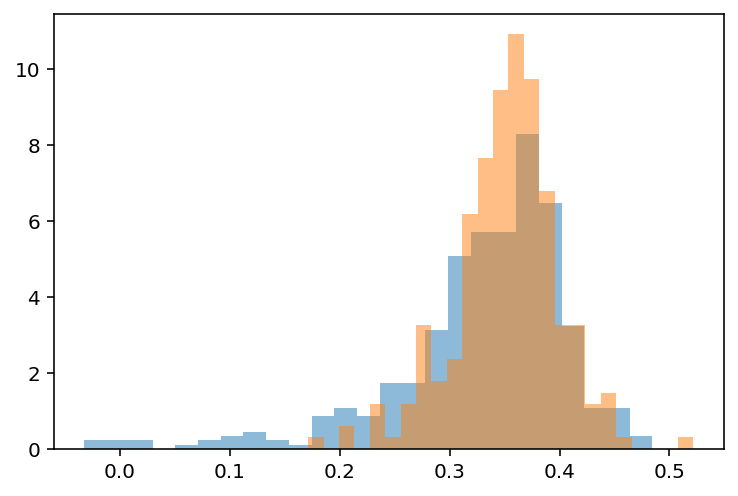

1036


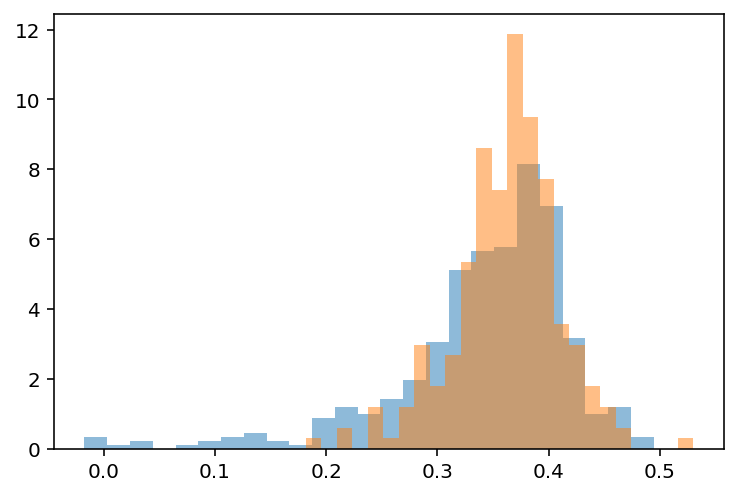

1037


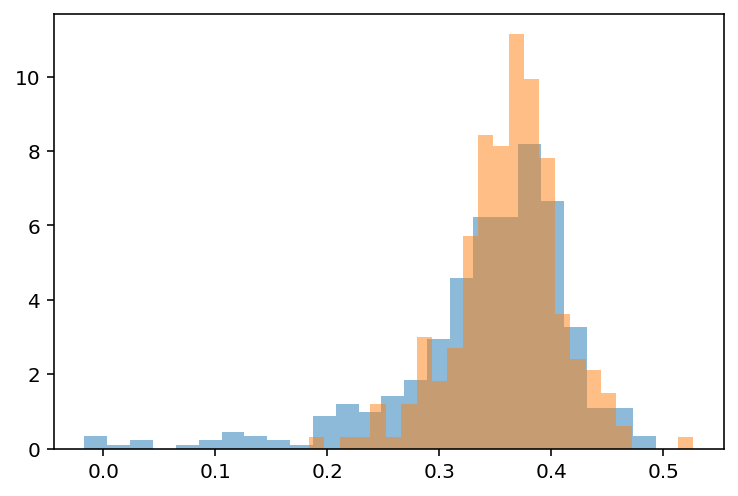

1038


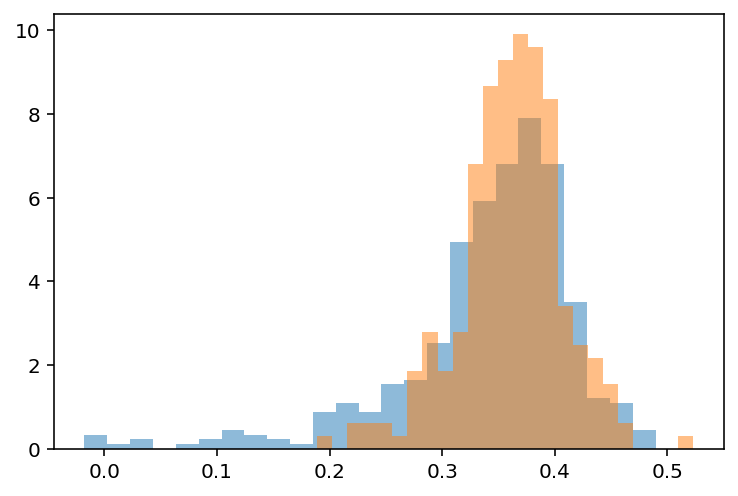

1039


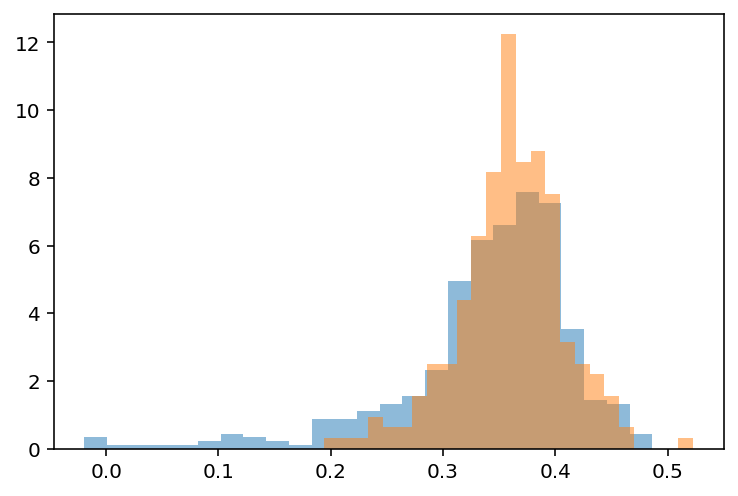

1040


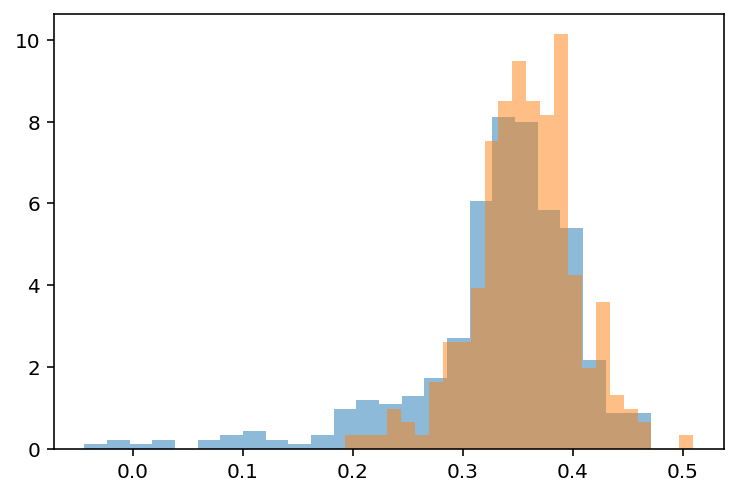

1041


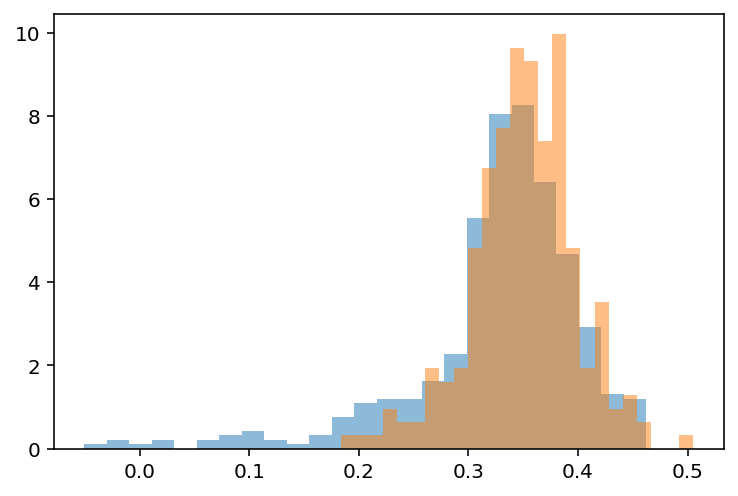

1042


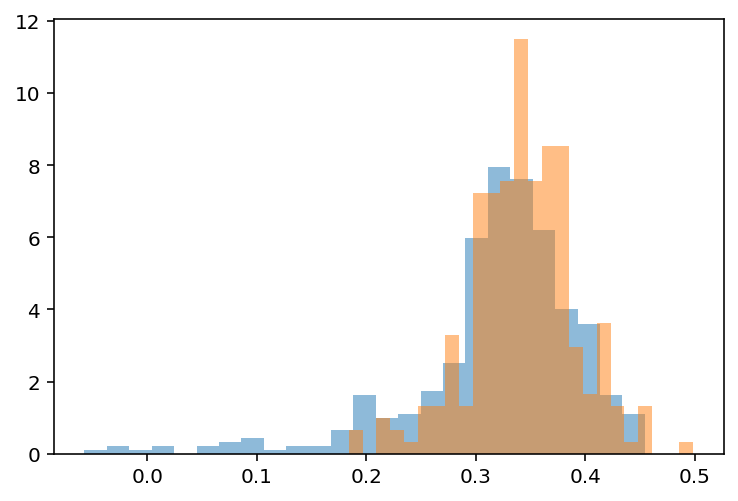

1043


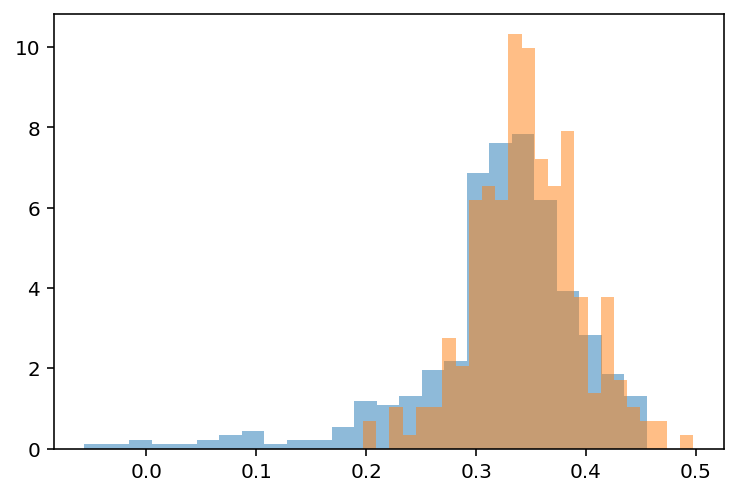

1044


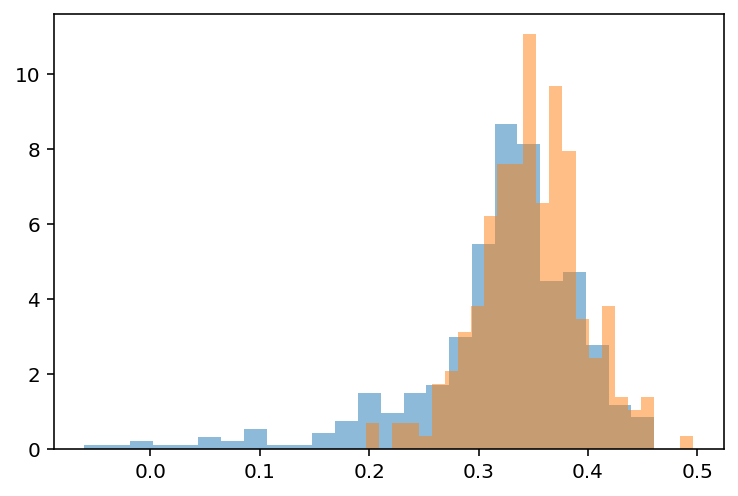

1045


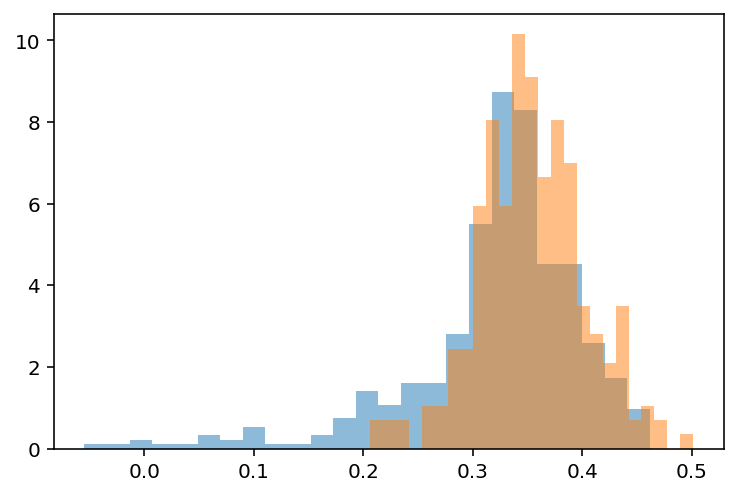

1046


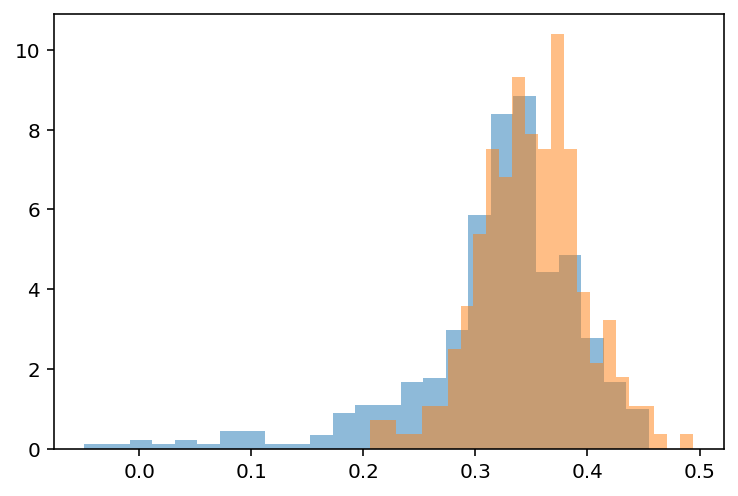

1047


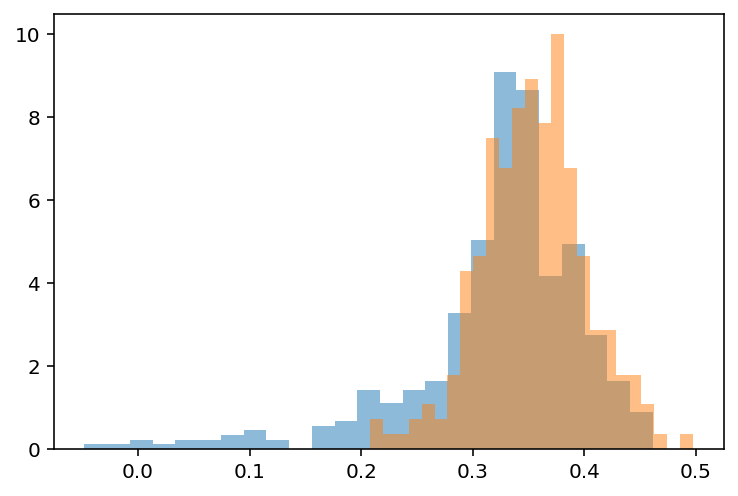

1048


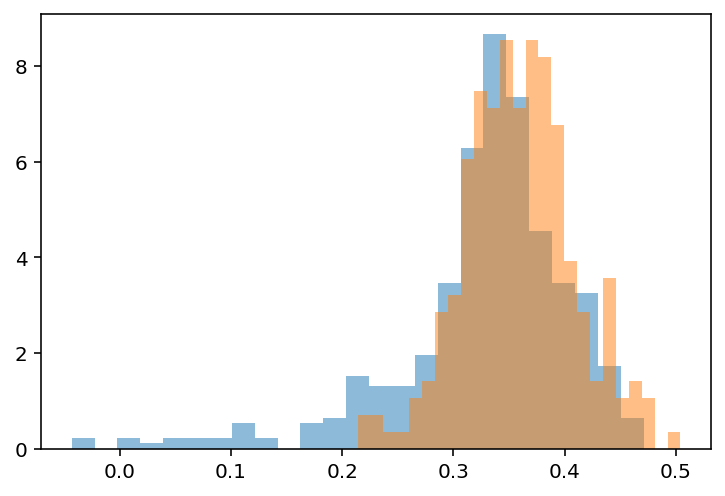

1049


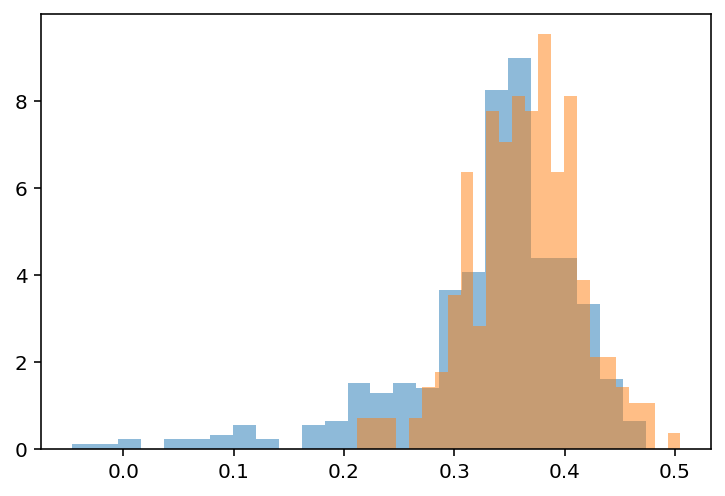

In [ ]:
# Specific kmers
for i in range(950, 1050):
    compare_kmer_plot(i)

In [ ]:
# Difference in means per kmer between positive and negative examples
diff_pos_neg = np.array(np.mean(positives, axis=0) - np.mean(negatives, axis=0))

-3.127962196193718e-16


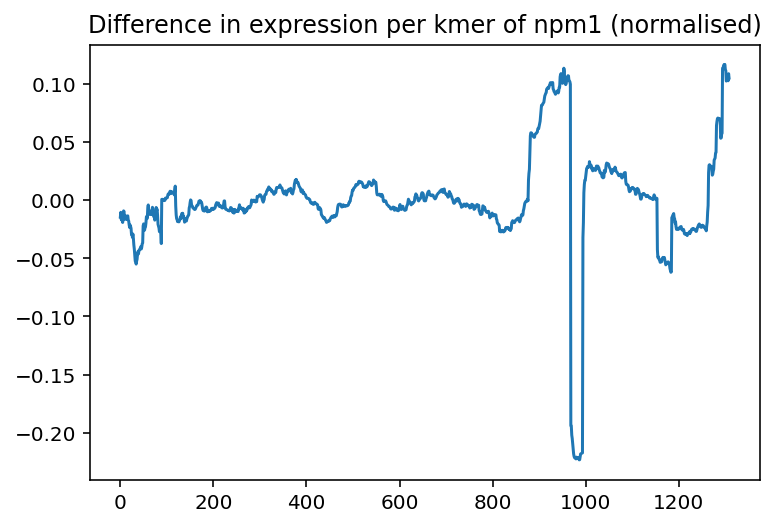

In [ ]:
print(np.mean(diff_pos_neg))
# plt.hist(diff_pos_neg, bins=50)
# plt.xlim(0, 2.3)
# plt.show()
plt.plot(diff_pos_neg)
plt.title("Difference in expression per kmer of npm1 (normalised)")
plt.show()

1304.8441399688322


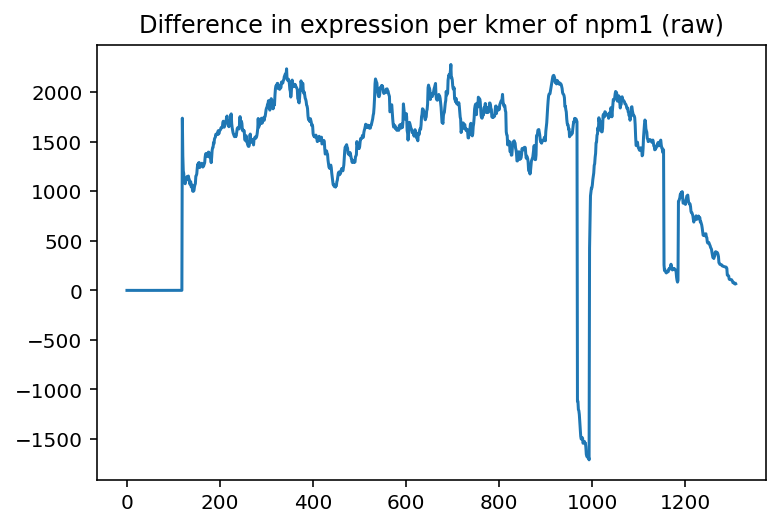

[-0.22620516 -0.20460528 -0.23481934 ... 67.43974673 63.30533417
 66.11939296]


In [ ]:
# Diff raw
from npm1_data_loading import kmer_table_filtered
positives = np.array(kmer_table_filtered.iloc[[i for i in range(len(npm1_filtered)) if npm1_filtered[i] == 1]])
negatives = np.array(kmer_table_filtered.iloc[[i for i in range(len(npm1_filtered)) if npm1_filtered[i] == 0]])
diff_pos_neg = np.array(np.mean(positives, axis=0) - np.mean(negatives, axis=0))
print(np.mean(diff_pos_neg))
# plt.hist(diff_pos_neg, bins=100)
# plt.show()
plt.plot(diff_pos_neg)
plt.title("Difference in expression per kmer of npm1 (raw)")
plt.show()
print(diff_pos_neg)

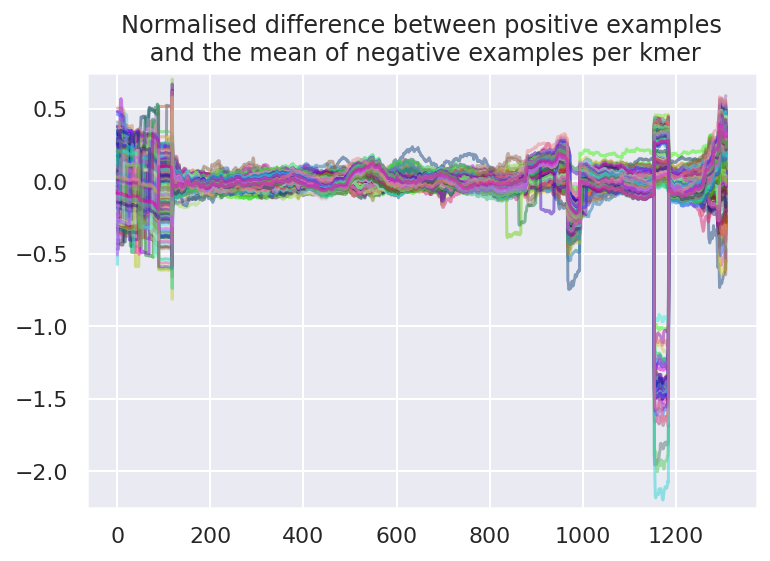

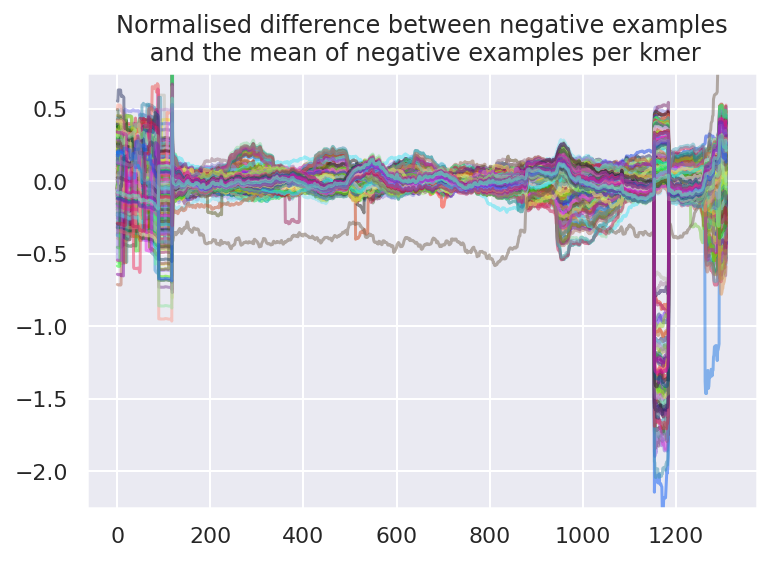

In [ ]:
# Overlapping graph
from npm1_data_loading import km_normed_1, npm1_filtered
pos_indices = [i for i in range(len(npm1_filtered)) if npm1_filtered[i] == 1]
neg_indices = [i for i in range(len(npm1_filtered)) if npm1_filtered[i] == 0]
all_neg = km_normed_1.iloc[neg_indices]
neg_mean = np.mean(all_neg, axis=0)
for pos in pos_indices:
    pos_example = np.array(km_normed_1.iloc[pos])
    diff = np.array(pos_example - neg_mean)
    plt.plot(diff, color=(rand.random(),rand.random(),rand.random(),0.5), label=f"patient_{pos}")
plt.title("Normalised difference between positive examples\n and the mean of negative examples per kmer")
plt.ylim(-2.25, 0.75)
plt.show()
for neg in neg_indices:
    neg_example = np.array(km_normed_1.iloc[neg])
    diff = np.array(neg_example - neg_mean)
    plt.plot(diff, color=(rand.random(),rand.random(),rand.random(),0.5), label=f"patient_{neg}")
plt.title("Normalised difference between negative examples\n and the mean of negative examples per kmer")
plt.ylim(-2.25, 0.75)
plt.show()

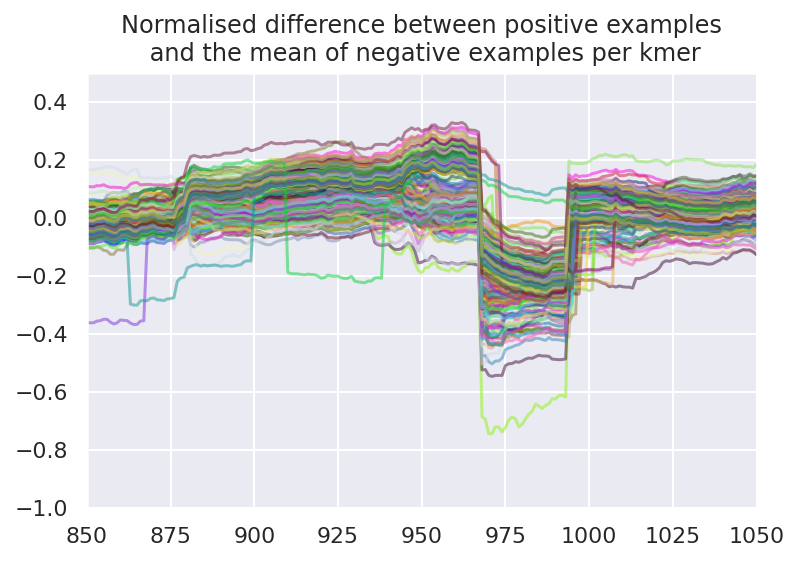

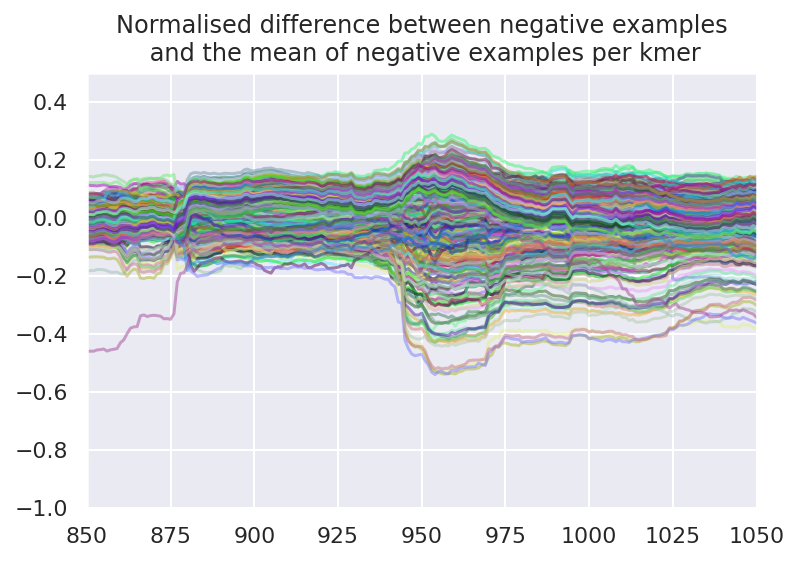

In [ ]:
for pos in pos_indices:
    pos_example = np.array(km_normed_1.iloc[pos])
    diff = np.array(pos_example - neg_mean)
    plt.plot(diff, color=(rand.random(),rand.random(),rand.random(),0.5), label=f"patient_{pos}")
plt.title("Normalised difference between positive examples\n and the mean of negative examples per kmer")
plt.ylim(-1, 0.5)
plt.xlim(850, 1050)
plt.show()
for neg in neg_indices:
    neg_example = np.array(km_normed_1.iloc[neg])
    diff = np.array(neg_example - neg_mean)
    plt.plot(diff, color=(rand.random(),rand.random(),rand.random(),0.5), label=f"patient_{neg}")
plt.title("Normalised difference between negative examples\n and the mean of negative examples per kmer")
plt.ylim(-1, 0.5)
plt.xlim(850, 1050)
plt.show()

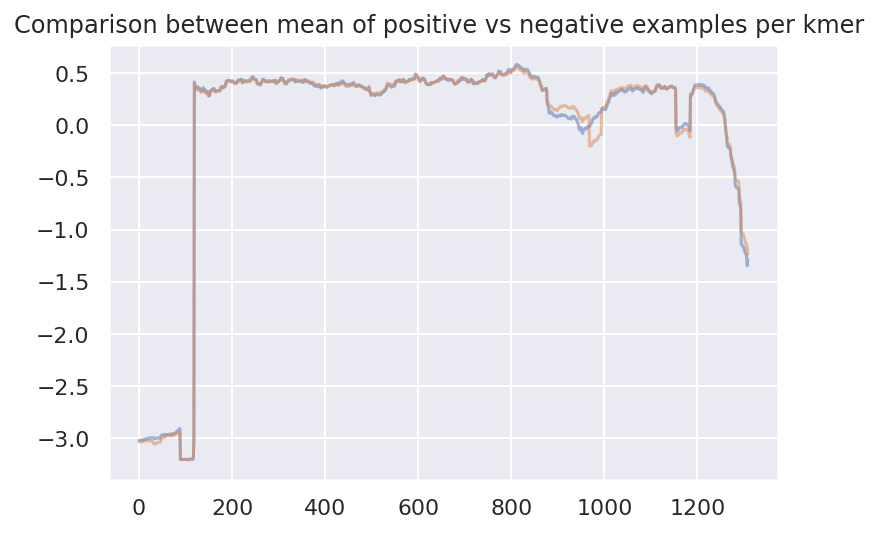

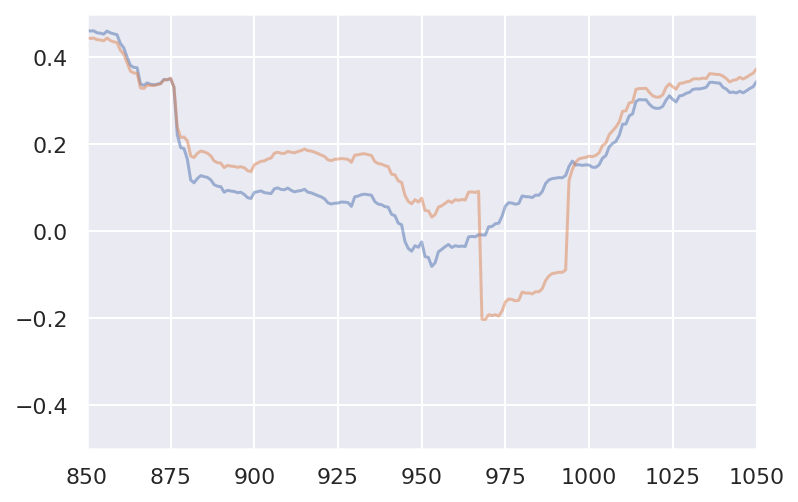

In [ ]:
# Mean of negatives and mean of positives
mean_neg = np.array(np.mean(km_normed_1.iloc[neg_indices], axis=0))
mean_pos = np.array(np.mean(km_normed_1.iloc[pos_indices], axis=0))
plt.plot(mean_neg, alpha=0.5)
plt.plot(mean_pos, alpha=0.5)
plt.title("Comparison between mean of positive vs negative examples per kmer ")
plt.show()
plt.plot(mean_neg, alpha=0.5)
plt.plot(mean_pos, alpha=0.5)
plt.xlim(850, 1050)
plt.ylim(-0.5,0.5)
plt.show()

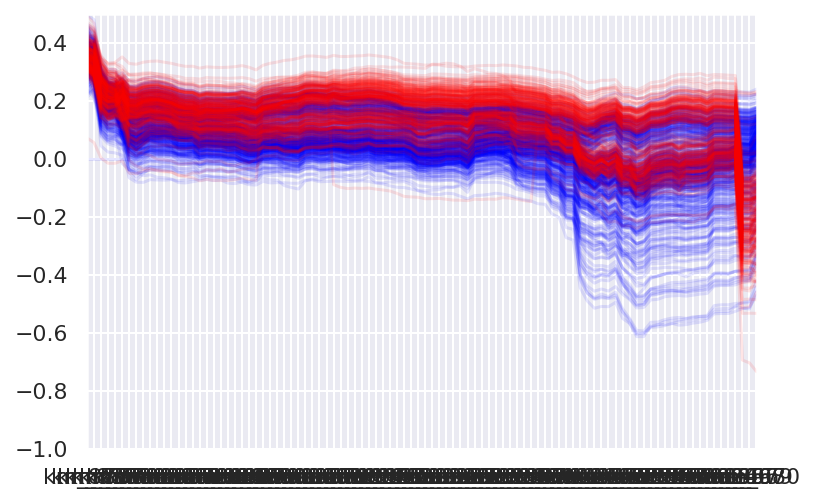

In [ ]:
for i in range(len(km_normed_1.iloc[neg_indices])):
    neg = km_normed_1.iloc[neg_indices].iloc[i]
    plt.plot(neg, color='blue', alpha=0.1)
for i in range(len(km_normed_1.iloc[pos_indices])):
    pos = km_normed_1.iloc[pos_indices].iloc[i]
    plt.plot(pos, color='red', alpha=0.1)
plt.xlim(875, 970)
plt.ylim(-1, 0.5)
plt.show()

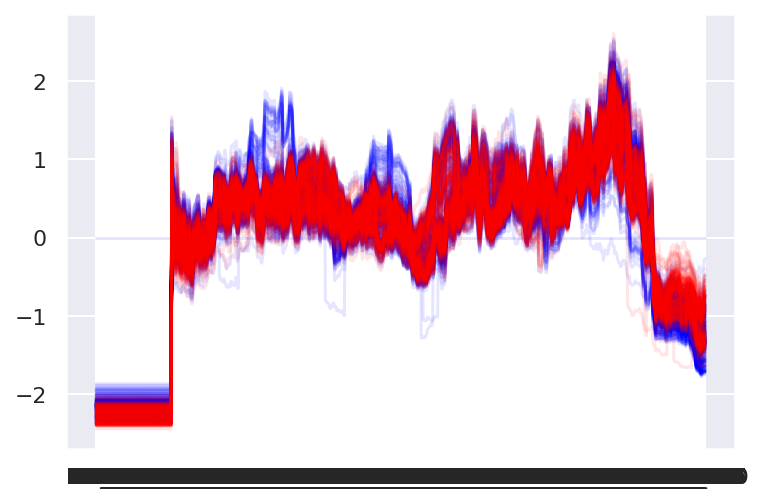

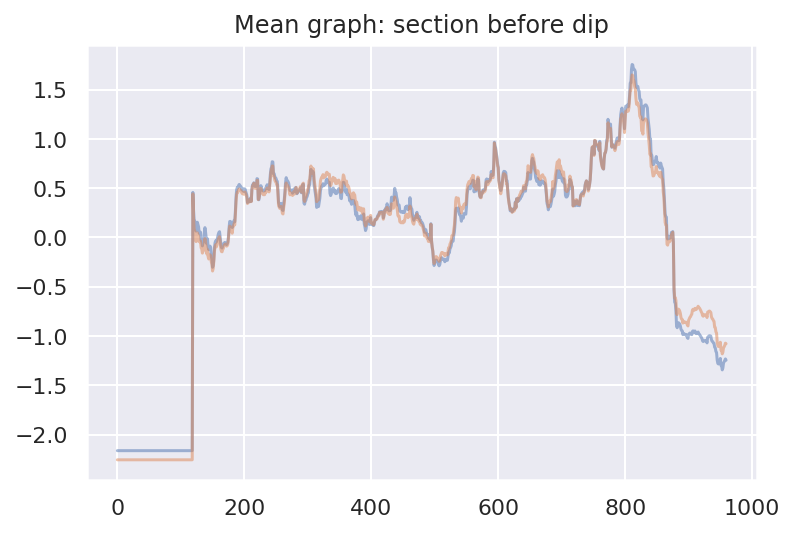

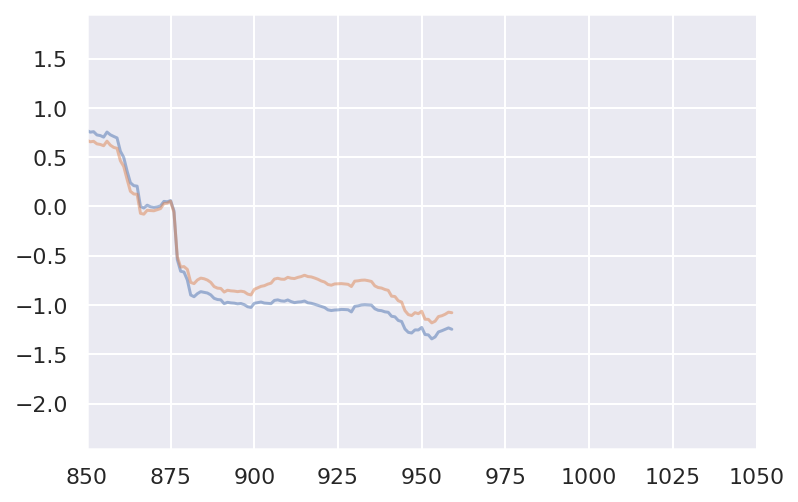

In [ ]:
from npm1_data_loading import kmer_table_filtered
from transforms import transform_log10, norm_1
test = norm_1(kmer_table_filtered.iloc[:,:960])
for i in range(len(test.iloc[neg_indices])):
    neg = test.iloc[neg_indices].iloc[i]
    plt.plot(neg, color='blue', alpha=0.1)
for i in range(len(test.iloc[pos_indices])):
    pos = test.iloc[pos_indices].iloc[i]
    plt.plot(pos, color='red', alpha=0.1)
plt.show()
mean_neg = np.array(np.mean(test.iloc[neg_indices], axis=0))
mean_pos = np.array(np.mean(test.iloc[pos_indices], axis=0))
plt.plot(mean_neg, alpha=0.5)
plt.plot(mean_pos, alpha=0.5)
plt.title("Mean graph: section before dip")
plt.show()
plt.plot(mean_neg, alpha=0.5)
plt.plot(mean_pos, alpha=0.5)
plt.xlim(850, 1050)
plt.show()

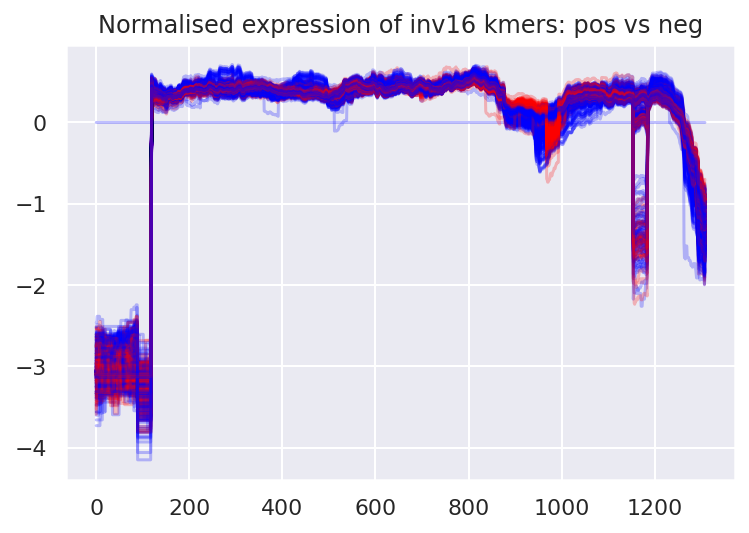

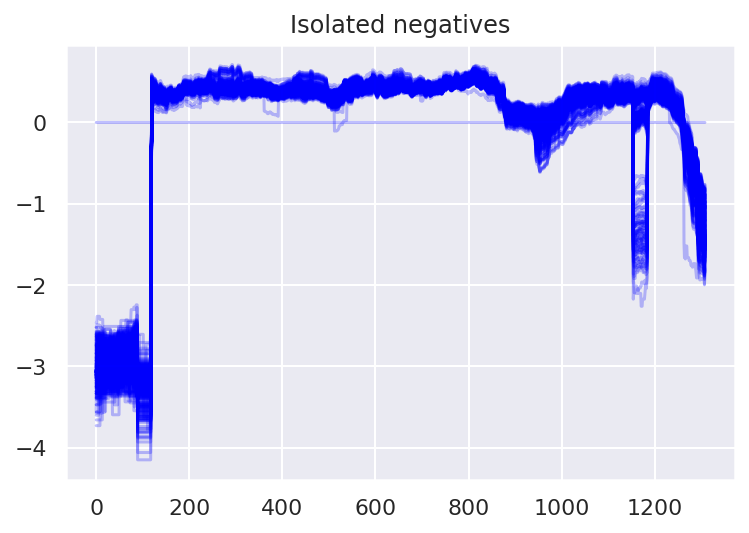

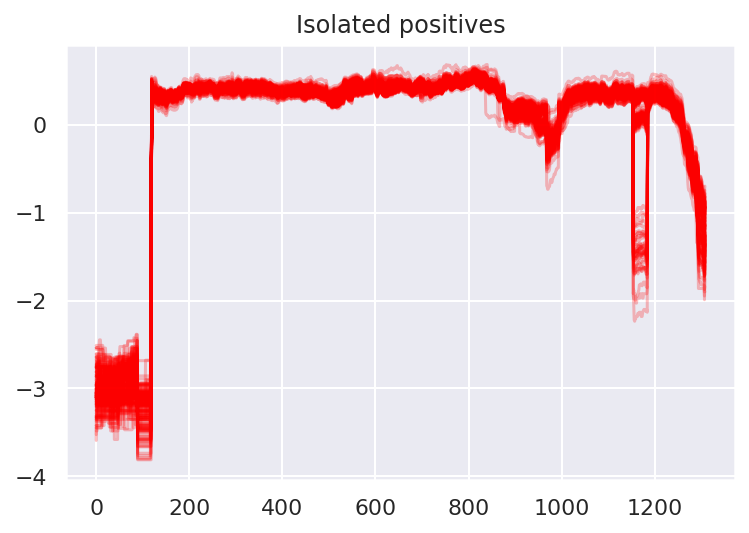

In [ ]:
# Overlap graph of normalised expression
for i in range(len(km_normed_1)):
    if npm1_filtered[i] == 0:
        plt.plot(np.array(km_normed_1.iloc[i]), color='blue', alpha=0.25)
    elif npm1_filtered[i] == 1:
        plt.plot(np.array(km_normed_1.iloc[i]), color='red', alpha=0.25)
plt.title("Normalised expression of inv16 kmers: pos vs neg")
plt.show()
for i in range(len(km_normed_1)):
    if npm1_filtered[i] == 0:
        plt.plot(np.array(km_normed_1.iloc[i]), color='blue', alpha=0.25)
plt.title("Isolated negatives")
plt.show()
for i in range(len(km_normed_1)):
    if npm1_filtered[i] == 1:
        plt.plot(np.array(km_normed_1.iloc[i]), color='red', alpha=0.25)
plt.title("Isolated positives")
plt.show()

### PyTorch Model

In [ ]:
# Simplified rewrite of splitting & oversampling code
from npm1_data_loading import km_normed_1, npm1_filtered

# Testing: removing essential kmers: 960 to 1000
# km_normed_1 = pd.concat((km_normed_1.iloc[:,:875], km_normed_1.iloc[:,1000:]), axis=1)

# Test split sizes (add up to 1)
train_size = 0.6
valid_size = 0.2
test_size = 0.2

# Separating out negatives & positives
positives = np.array(km_normed_1.iloc[[i for i in range(len(npm1_filtered)) if npm1_filtered[i] == 1]])
negatives = np.array(km_normed_1.iloc[[i for i in range(len(npm1_filtered)) if npm1_filtered[i] == 0]])

# Add randomness to splitting
np.random.shuffle(negatives)
np.random.shuffle(positives)

# Splitting sets
num_pos = len(positives)
num_neg = len(negatives)
sum_sizes = train_size + valid_size + test_size
ps1, ps2 = math.floor(train_size*num_pos), math.floor((train_size+valid_size)*num_pos)
ns1, ns2 = math.floor(train_size*num_neg), math.floor((train_size+valid_size)*num_neg)
train_set = np.concatenate((negatives[:ns1], positives[:ps1]))
valid_set = np.concatenate((negatives[ns1:ns2], positives[ps1:ps2]))
test_set = np.concatenate((negatives[ns2:], positives[ps2:]))
n_neg_train, n_neg_val, n_neg_test = ns1, (ns2-ns1), (num_neg-ns2)
n_pos_train, n_pos_val, n_pos_test = ps1, (ps2-ps1), (num_pos-ps2)
train_label = [0] * n_neg_train + [1] * n_pos_train
valid_label = [0] * n_neg_val + [1] * n_pos_val
test_label = [0] * n_neg_test + [1] * n_pos_test

# Oversample each set
# n_extra_pos_train, n_extra_pos_val, n_extra_pos_test = n_neg_train-n_pos_train, n_neg_val-n_pos_val, n_neg_test-n_pos_test
# over_train = np.array([]).reshape((0,km_normed_1.shape[1]))
# over_valid = np.array([]).reshape((0,km_normed_1.shape[1]))
# over_test = np.array([]).reshape((0,km_normed_1.shape[1]))
# i,j,k = 0,0,0
# while len(over_train) < n_extra_pos_train:
#     over_train = np.concatenate((over_train, train_set[n_neg_train + i % n_pos_train].reshape(1,km_normed_1.shape[1])))
#     train_label += [1]
#     i += 1
# while len(over_valid) < n_extra_pos_val:
#     over_valid = np.concatenate((over_valid, valid_set[n_neg_val + j % n_pos_val].reshape(1,km_normed_1.shape[1])))
#     valid_label += [1]
#     j += 1
# while len(over_test) < n_extra_pos_test:
#     over_test = np.concatenate((over_test, test_set[n_neg_test + k % n_pos_test].reshape(1,km_normed_1.shape[1])))
#     test_label += [1]
#     k += 1
# oc_train_set = np.concatenate((train_set, over_train))
# oc_valid_set = np.concatenate((valid_set, over_valid))
# oc_test_set = np.concatenate((test_set, over_test))

train_and_label = [(train_set[i],train_label[i]) for i in range(len(train_label))]
valid_and_label = [(valid_set[i],valid_label[i]) for i in range(len(valid_label))]
test_and_label = [(test_set[i],test_label[i]) for i in range(len(test_label))]

# Data samplers & loaders
batch_size = 64
num_workers = 0
train_sampler = SubsetRandomSampler(range(len(train_and_label)))
valid_sampler = SubsetRandomSampler(range(len(valid_and_label)))
test_sampler = SubsetRandomSampler(range(len(test_and_label)))
train_loader = torch.utils.data.DataLoader(train_and_label,
                                           batch_size=batch_size,
                                           sampler=train_sampler,
                                           num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(valid_and_label,
                                           batch_size=batch_size,
                                           sampler=valid_sampler,
                                           num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_and_label,
                                           batch_size=batch_size,
                                           sampler=test_sampler,
                                           num_workers=num_workers)

In [ ]:
len(negatives), len(positives)

(449, 242)

In [ ]:
if torch.cuda.is_available():  
    dev = "cuda:0" 
else:  
    dev = "cpu"
device = torch.device(dev)

# 4 layers sgd lr=0.01 and no dropout
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(km_normed_1.shape[1], 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 32)
        self.fc4 = nn.Linear(32, 8)
        self.fc5 = nn.Linear(8, 2)
        #self.dropout = nn.Dropout(0.2)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        #x = self.dropout(x)
        x = F.relu(self.fc2(x))
        #x = self.dropout(x)
        x = F.relu(self.fc3(x))
        #x = self.dropout(x)
        x = F.relu(self.fc4(x))
        #x = self.dropout(x)
        x = self.fc5(x)
        return x
    
    def predict(self,x):
        pred = F.softmax(self.forward(x), dim=1)
        ans = []
        for t in pred:
            if t[0]>t[1]:
                ans.append(0)
            else:
                ans.append(1)
        return torch.tensor(ans)

n_epochs = 2000
valid_loss_min = np.Inf
t_losses = []
v_losses = []

model = Net()
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

for epoch in range(n_epochs):
    train_loss = 0.0
    valid_loss = 0.0
    
    # Training
    model.train()
    for data, target in train_loader:
        optimizer.zero_grad()
        data = data.to(device)
        target = target.to(device)
        output = model(data.float())
        target = target.long()
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)
        
    # Validation
    model.eval()
    for data, target in valid_loader:
        data = data.to(device)
        target = target.to(device)
        output = model(data.float())
        target = target.long()
        loss = criterion(output, target)
        valid_loss += loss.item()*data.size(0)
        
    # Saving loss for validation graph
    train_loss = train_loss/len(train_loader.sampler)
    valid_loss = valid_loss/len(valid_loader.sampler)
    t_losses.append(train_loss)
    v_losses.append(valid_loss)
    
    # save model if validation loss has decreased
    if valid_loss < valid_loss_min:
        torch.save(model.state_dict(), 'model_files/model_npm1_0.pt')
        valid_loss_min = valid_loss
    
    # Progress bar
    print(f"\rEpoch: {epoch+1}\tTrain: {train_loss}\tVal: {valid_loss}\tMin Val: {valid_loss_min}", end='')
print("")
torch.save(model.state_dict(), 'model_files/model_npm1_0.pt')

# Final model
model.load_state_dict(torch.load('model_files/model_npm1_0.pt'))
from sklearn.metrics import roc_auc_score
model.eval()
score = 0
for data, target in test_loader:
    data = data.to(device)
    pred = model.predict(data.float())
    pred.cpu()
    score += roc_auc_score(pred, target)*len(target)
    #print(roc_auc_score(pred, target))
    print(pred)
    print(target)
print('\n', score/len(test_loader.sampler))

# Saved best model
model.load_state_dict(torch.load('model_files/model_npm1_0.pt'))
model.eval()
score = 0
for data, target in test_loader:
    data = data.to(device)
    data.float()
    pred = model.predict(data.float())
    pred.cpu()
    print(pred)
    print(target)
    score += roc_auc_score(pred, target)*len(target)
    #print(roc_auc_score(pred, target))
print('\n', score/len(test_loader.sampler))

# Validation graph
plt.plot(t_losses)
plt.plot(v_losses)
plt.ylim(0,1)
plt.show()

Epoch: 2000	Train: 0.546703400099335	Val: 0.6511532206466233	Min Val: 0.5966100735940795
tensor([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0])


ValueError: ignored

In [ ]:
roc_auc_score([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0])

0.4945355191256831